In [1]:
!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from lmfit import Model
import scipy.special as sp
from scipy.special import jv
import ast
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


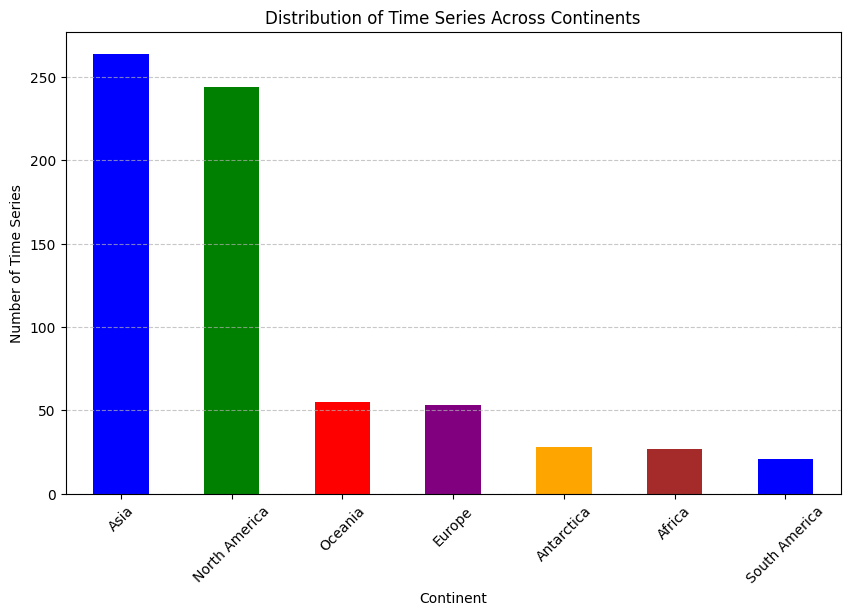

In [24]:
df = pd.read_csv("/content/drive/MyDrive/NOAAData.csv")
df.head()

# Function to categorize based on latitude and longitude manually
def assign_continent(lat, lon):
    if lat < -60:
        return "Antarctica"
    elif -60 <= lat <= 85:
        if -180 <= lon < -30:
            return "North America" if lat >= 7 else "South America"
        elif -30 <= lon < 60:
            return "Europe" if lat > 35 else "Africa"
        elif 60 <= lon < 150:
            return "Asia" if lat > 5 else "Oceania"
        elif 150 <= lon <= 180 or -180 <= lon < -120:
            return "Oceania"
    return "Unknown"

# Apply function to assign continent
df['continent'] = df.apply(lambda row: assign_continent(row['geo_meanLat'], row['geo_meanLon']), axis=1)

# Display sample results
df[['dataSetName', 'geo_meanLat', 'geo_meanLon', 'continent']].head()

# Save the categorized dataset to a new CSV file
output_path = "/content/drive/MyDrive/NOAAData_with_continents.csv"
df.to_csv(output_path, index=False)

continent_counts = df['continent'].value_counts()

plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel("Continent")
plt.ylabel("Number of Time Series")
plt.title("Distribution of Time Series Across Continents")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [25]:
# Get unique paleoData_variableName values
unique_paleo_variables = df['paleoData_variableName'].unique()

# Define broad paleo-data categories based on variable names
paleo_categories = {
    "temperature": ["temperature", "temperature3", "temperature1"],
    "precipitation": ["precipitation", "rainfall", "PDSI"],
    "isotopes": ["d18O", "d13C", "dD"],
    "tree growth": ["trsgi"],
    "geochemistry": ["reflectance", "BSi", "Mg/Ca"],
    "other": []
}

# Assign category function
def categorize_paleo_data(variable):
    for category, keywords in paleo_categories.items():
        if any(keyword.lower() in str(variable).lower() for keyword in keywords):
            return category
    return "other"  # Default if no match

# Apply function to categorize paleo data
df['paleoData_category'] = df['paleoData_variableName'].apply(categorize_paleo_data)

# Save the updated dataset
categorized_output_path = "/content/drive/MyDrive/NOAAData_with_paleo_categories.csv"
df.to_csv(categorized_output_path, index=False)

# Show some sample results
df[['dataSetName', 'paleoData_variableName', 'paleoData_category']].head(), categorized_output_path

(                       dataSetName paleoData_variableName paleoData_category
 0   Afr-ColdAirCave.Sundqvist.2013                   d18O           isotopes
 1       Afr-LakeMalawi.Powers.2011            temperature        temperature
 2  Afr-LakeTanganyika.Tierney.2010            temperature        temperature
 3        Afr-P178-15P.Tierney.2015            temperature        temperature
 4        Afr-P178-15P.Tierney.2015            temperature        temperature,
 '/content/drive/MyDrive/NOAAData_with_paleo_categories.csv')

1. **d18O**:
   - **δ18O** refers to the ratio of oxygen isotopes (18O/16O) in a sample, often used in ice cores, tree rings, or marine sediments. It’s a common proxy for past temperatures, as the ratio changes with temperature and precipitation patterns.

2. **temperature**:
   - Direct measurements or reconstructions of past temperatures, often used in climate studies.

3. **dD**:
   - **δD** refers to the ratio of deuterium (D) to hydrogen (H) isotopes. Like δ18O, δD is used in climate reconstructions, particularly in ice cores, to infer past temperature and precipitation conditions.

4. **density**:
   - Refers to the mass per unit volume of a material, often used in ice or sediment cores to understand changes in climate and environmental conditions.

5. **trsgi**:
   - This stands for the **Tropical and Subtropical Global Surface Temperature Index** and is used to represent tropical and subtropical temperature variations.

6. **thickness**:
   - Refers to the thickness of a sediment layer, ice core, or tree ring, which can indicate various environmental or climatic changes over time, such as growth rates or seasonal variations.

7. **MXD**:
   - **Maximum X-ray Density** is a measurement often used in dendrochronology (tree ring analysis) to estimate tree density and climate conditions.

8. **X_radiograph_dark_layer**:
   - Refers to dark layers identified through X-ray radiographs, often in ice cores or sediments. These layers can represent periods of specific environmental events, like volcanic eruptions or major climate shifts.

9. **massacum**:
   - Likely refers to **mass accumulation rate**, which indicates the amount of material (like snow or sediment) accumulated over time. It’s often used to assess precipitation or other climatic processes.

10. **melt**:
   - Refers to the melting of ice or snow, which is important for understanding past climate conditions, especially in glacial or polar regions.

11. **RABD660_670**:
   - This could be a specific wavelength ratio from reflectance spectroscopy or some other specialized data measurement. The exact meaning would depend on the methodology of the study.

12. **Sr_Ca**:
   - Refers to the ratio of **Strontium (Sr) to Calcium (Ca)**. This ratio can be used as a proxy for environmental conditions, particularly in marine sediments or corals, and can reflect temperature, salinity, and other water properties.

13. **composite**:
   - Refers to a composite dataset or proxy, which is typically a combination of multiple data sources or measurements used to create a more robust representation of past climate.

14. **calcification**:
   - Refers to the process of calcification, which is the formation of calcium carbonate in marine organisms like corals or mollusks. It can be used as a proxy for ocean temperature and other environmental conditions.


<ipython-input-26-8c92920d393a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


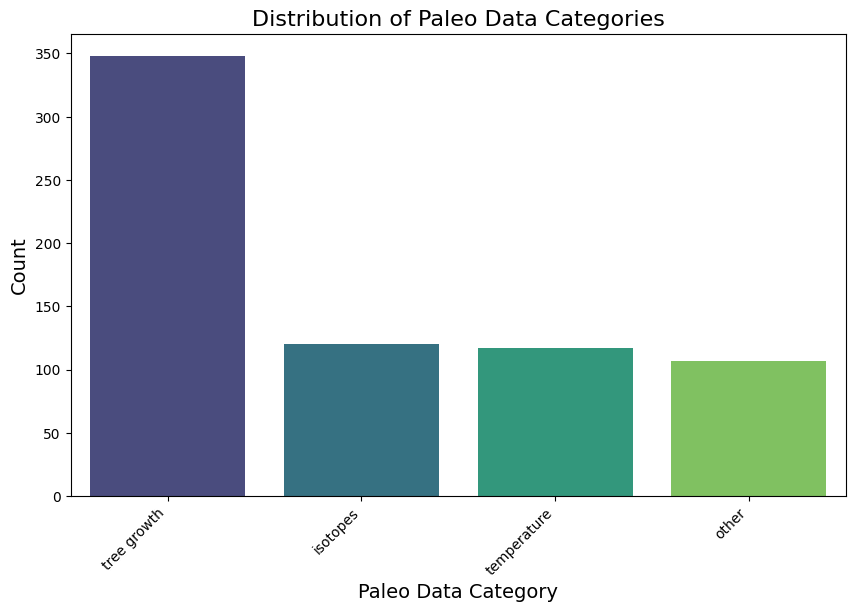

In [26]:
# Count the number of records per paleoData_category
category_counts = df['paleoData_category'].value_counts()

# Plot the distribution of paleoData categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Paleo Data Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Paleo Data Categories", fontsize=16)
plt.xticks(rotation=45, ha="right")

# Show plot
plt.show()


***Note:***

Country - 1 or 2 country (european?; look for sea country) \
All paleo categories (must be similar time period) apples to apples


In [27]:
print(df[['year', 'paleoData_values']].head(10))
print(df.dtypes)

                                                year  \
0  [1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987....   
1  [1996.0, 1992.0, 1981.0, 1965.0, 1959.0, 1954....   
2  [1986.0, 1976.0, 1966.0, 1956.0, 1946.0, 1936....   
3  [2000.0, 1997.0, 1993.6667, 1991.0, 1988.3333,...   
4  [1980.0, 1974.0625, 1968.1875, 1962.3125, 1956...   
5  [1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987....   
6  [1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989....   
7  [-6742.0, -5502.0, -4438.0, -3524.0, -2738.0, ...   
8  [1995.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990....   
9  [1918.9435, 1910.2775, 1901.6115, 1892.9455, 1...   

                                    paleoData_values  
0  [0.459055, 0.4062401, 0.3621507, 0.3517711, 0....  
1  [27.43, 26.84, 26.87, 26.85, 25.33, 26.44, 26....  
2  [25.6263562901116, 24.9873700037754, 24.559853...  
3  [27.991, 28.0915, 28.138, 27.9088, 27.9526, 28...  
4  [27.5623, 27.3648, 27.6094, 27.5759, 27.6686, ...  
5  [-32.22, -31.1, -27.35, -26.98, -28.86, -29.64... 

In [28]:
# Function to convert string lists into actual lists
def convert_to_list(val):
    if isinstance(val, str):  # If stored as a string
        try:
            return ast.literal_eval(val)  # Safely convert to list
        except:
            return None  # Return None if conversion fails
    return val  # Return as is if already a list

# Apply conversion
df['year'] = df['year'].apply(convert_to_list)
df['paleoData_values'] = df['paleoData_values'].apply(convert_to_list)

In [29]:
# Function to expand the lists into separate rows
def expand_rows(df, year_col='year', value_col='paleoData_values'):
    expanded_rows = []

    for _, row in df.iterrows():
        years = row[year_col]
        values = row[value_col]

        # Ensure both are lists and have the same length
        if isinstance(years, list) and isinstance(values, list) and len(years) == len(values):
            for y, v in zip(years, values):
                expanded_rows.append({**row, year_col: y, value_col: v})

    return pd.DataFrame(expanded_rows)

# Apply expansion
df_expanded = expand_rows(df)

# Convert to numeric
df_expanded['year'] = pd.to_numeric(df_expanded['year'], errors='coerce')
df_expanded['paleoData_values'] = pd.to_numeric(df_expanded['paleoData_values'], errors='coerce')

# Drop NaN values
df_expanded.dropna(subset=['year', 'paleoData_values'], inplace=True)

# Print first rows to confirm successful expansion
print(df_expanded.head())

   Unnamed: 0 paleoData_pages2kID                     dataSetName archiveType  \
0           0             Afr_012  Afr-ColdAirCave.Sundqvist.2013  speleothem   
1           0             Afr_012  Afr-ColdAirCave.Sundqvist.2013  speleothem   
2           0             Afr_012  Afr-ColdAirCave.Sundqvist.2013  speleothem   
3           0             Afr_012  Afr-ColdAirCave.Sundqvist.2013  speleothem   
4           0             Afr_012  Afr-ColdAirCave.Sundqvist.2013  speleothem   

   geo_meanElev  geo_meanLat  geo_meanLon    year yearUnits  \
0        1450.0        -24.0        29.18  1992.0        AD   
1        1450.0        -24.0        29.18  1991.0        AD   
2        1450.0        -24.0        29.18  1990.0        AD   
3        1450.0        -24.0        29.18  1989.0        AD   
4        1450.0        -24.0        29.18  1988.0        AD   

  paleoData_variableName paleoData_units  paleoData_values paleoData_proxy  \
0                   d18O          permil          0.4590

# **Temperature**

In [30]:
# Check Available Variables
print("Unique paleoData_variableName values:", df["paleoData_variableName"].unique())

# Filter Only Temperature Data
df_temp = df[df["paleoData_variableName"].str.contains("temperature|temperature1|temperature3", case=False, na=False)].copy()

# Expand List Columns (Year & Values)
df_temp = df_temp.explode(["year", "paleoData_values"])

# Convert Columns to Numeric
df_temp["year"] = pd.to_numeric(df_temp["year"], errors="coerce")
df_temp["paleoData_values"] = pd.to_numeric(df_temp["paleoData_values"], errors="coerce")

# Remove Years Below 0
df_temp = df_temp[df_temp["year"] >= 0]

Unique paleoData_variableName values: ['d18O' 'temperature' 'dD' 'density' 'trsgi' 'thickness' 'MXD'
 'X_radiograph_dark_layer' 'massacum' 'melt' 'temperature1' 'RABD660_670'
 'Sr_Ca' 'composite' 'calcification' 'temperature3']


In [40]:
# Filter datasets that have data reaching year 2000
df_2000 = df_temp[df_temp["year"] == 1900]

# Get unique dataset names for each continent
datasets_by_continent = df_2000.groupby("continent")["dataSetName"].unique()

# Display the dataset names
for continent, datasets in datasets_by_continent.items():
    print(f"Continent: {continent}")
    print("Datasets:", datasets)
    print("-" * 50)

Continent: Africa
Datasets: ['Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011']
--------------------------------------------------
Continent: Antarctica
Datasets: ['Ant-DSS.DahlJensen.1999' 'Ant-WAIS-Divide.Severinghaus.2012']
--------------------------------------------------
Continent: Asia
Datasets: ['Arc-Yamalia.Briffa.2013' 'Asi-CentralChina.Wang.1998'
 'Asi-EastChina.Wang.1990' 'Asi-EastChina.Wang.1998'
 'Asi-Fujian.Wang.1998' 'Asi-Guangdong.Zheng.1982'
 'Asi-GuangdongAndGuangxi.Zhang.1980' 'Asi-Hunan-Jiangsu.Zhang.1980'
 'Asi-KunashirIsland.Demezhko.2009' 'Asi-LowerYangtzeRiver.Zhang.1980'
 'Asi-MiddleYangtzeRiver.Zhang.1980' 'Asi-SouthChina.Wang.1998'
 'Asi-ZhejiangAndFujian.Zhang.1980']
--------------------------------------------------
Continent: Europe
Datasets: ['Arc-Lomonosovfonna.Divine.2011' 'Arc-Tornetrask.Melvin.2012'
 'Asi-SourthAndMiddleUrals.Demezhko.2007'
 'Eur-CentralEurope.Dobrovolný.2009'
 'Eur-CentralandEasternPyrenees.Pla.2004'
 'Eur-FinnishLakelands.Helama.2014

<ipython-input-41-69a0976e4040>:35: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  subset.plot(ax=ax, markersize=50, color=color, alpha=0.7, edgecolor="black", label=continent)


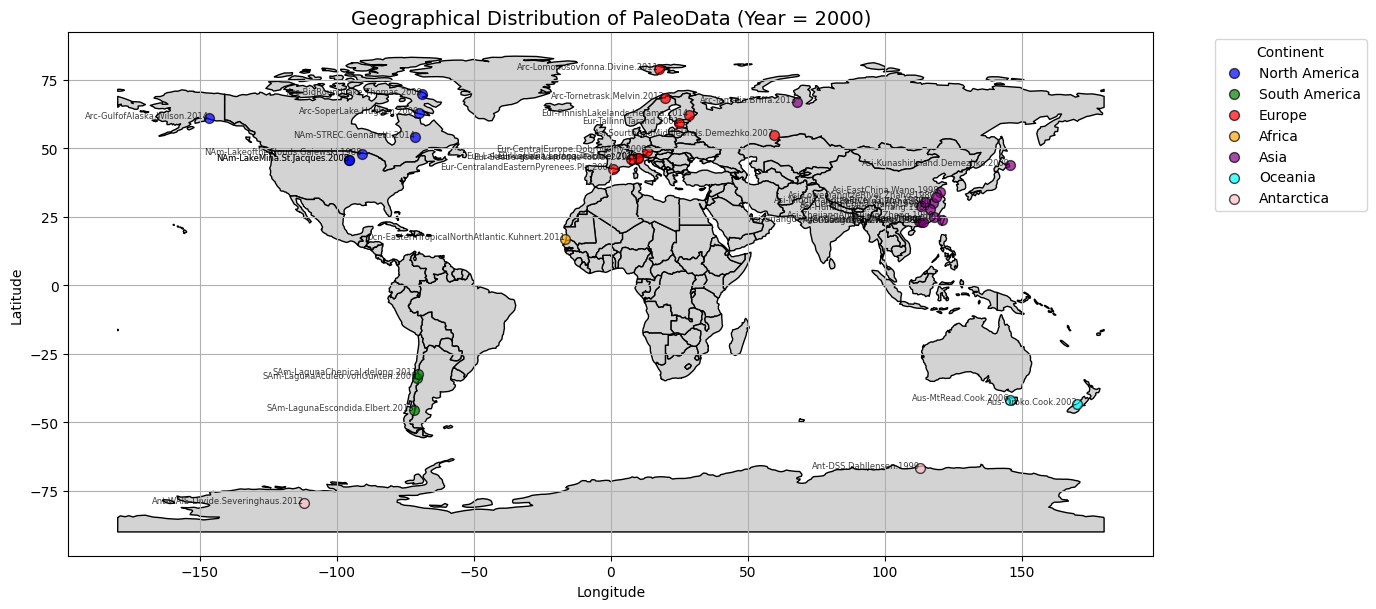

In [41]:
# Filter datasets with data extending to year 2000+
df_2000 = df_temp[df_temp["year"] == 1900]

# Select relevant columns (Year, PaleoData, Latitude, Longitude, Dataset Name, Continent)
df_mapped = df_2000[["year", "paleoData_values", "geo_meanLat", "geo_meanLon", "dataSetName", "continent"]]

# Remove missing location data
df_mapped = df_mapped.dropna(subset=["geo_meanLat", "geo_meanLon"])

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapped, geometry=gpd.points_from_xy(df_mapped["geo_meanLon"], df_mapped["geo_meanLat"]))

# Load world map using Natural Earth dataset
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Step 6: Define colors for each continent
continent_colors = {
    "North America": "blue",
    "South America": "green",
    "Europe": "red",
    "Africa": "orange",
    "Asia": "purple",
    "Oceania": "cyan",
    "Antarctica": "pink",
    "Unknown": "gray"
}

# Plot world map
fig, ax = plt.subplots(figsize=(14, 7))
world.plot(ax=ax, color="lightgray", edgecolor="black")  # Base world map

# Plot each continent with different colors
for continent, color in continent_colors.items():
    subset = gdf[gdf["continent"] == continent]
    subset.plot(ax=ax, markersize=50, color=color, alpha=0.7, edgecolor="black", label=continent)

# Add dataset names as small labels next to points
for _, row in gdf.iterrows():
    plt.text(row["geo_meanLon"], row["geo_meanLat"], row["dataSetName"],
             fontsize=6, ha="right", color="black", alpha=0.75)

# Customize plot
plt.title("Geographical Distribution of PaleoData (Year = 2000)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

In [33]:
!rm -rf /content/paleoData_temp_exports1
!rm -rf /content/paleoData_temp_exports2

In [42]:
import os
import pandas as pd

# Ensure numeric columns
df_temp["year"] = pd.to_numeric(df_temp["year"], errors="coerce")
df_temp["paleoData_values"] = pd.to_numeric(df_temp["paleoData_values"], errors="coerce")

# Filter datasets that include the year 2000
df_2000 = df_temp[df_temp["year"] == 1900]

# Automatically select ONE dataset per continent that includes the year 2000
selected_datasets = (
    df_2000.groupby("continent")["dataSetName"]
    .unique()
    .apply(lambda x: x[0] if len(x) > 0 else None)
    .dropna()
    .to_dict()
)

# Create output folder
output_folder = "paleoData_temp_exports1"
os.makedirs(output_folder, exist_ok=True)

# Export each selected dataset to CSV
for continent, dataset_name in selected_datasets.items():
    # Filter data for the specific dataset
    subset = df_temp[df_temp["dataSetName"] == dataset_name][["year", "paleoData_values"]]

    if subset.empty:
        print(f"Warning: No data found for {dataset_name}. Skipping export.")
        continue

    # Create a valid filename
    safe_filename = "".join(c if c.isalnum() or c in "._-" else "_" for c in dataset_name)

    # Save to CSV
    file_path = os.path.join(output_folder, f"{safe_filename}.csv")
    subset.to_csv(file_path, index=False)

    print(f"Saved: {file_path}")

# List exported files
print(f"Exported files: {os.listdir(output_folder)}")

Saved: paleoData_temp_exports1/Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011.csv
Saved: paleoData_temp_exports1/Ant-DSS.DahlJensen.1999.csv
Saved: paleoData_temp_exports1/Arc-Yamalia.Briffa.2013.csv
Saved: paleoData_temp_exports1/Arc-Lomonosovfonna.Divine.2011.csv
Saved: paleoData_temp_exports1/Arc-BigRoundLake.Thomas.2009.csv
Saved: paleoData_temp_exports1/Aus-MtRead.Cook.2006.csv
Saved: paleoData_temp_exports1/SAm-LagunaAculeo.vonGunten.2009.csv
Exported files: ['Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011.csv', 'Arc-BigRoundLake.Thomas.2009.csv', 'Arc-Lomonosovfonna.Divine.2011.csv', 'SAm-LagunaAculeo.vonGunten.2009.csv', 'SAm-LagunaChepical.deJong.2013.csv', 'Arc-Kongressvatnet.D_Andrea.2012.csv', 'Ant-DSS.DahlJensen.1999.csv', 'Arc-Yamalia.Briffa.2013.csv', 'Ant-WAIS-Divide.Severinghaus.2012.csv', 'Aus-MtRead.Cook.2006.csv', 'Afr-P178-15P.Tierney.2015.csv']


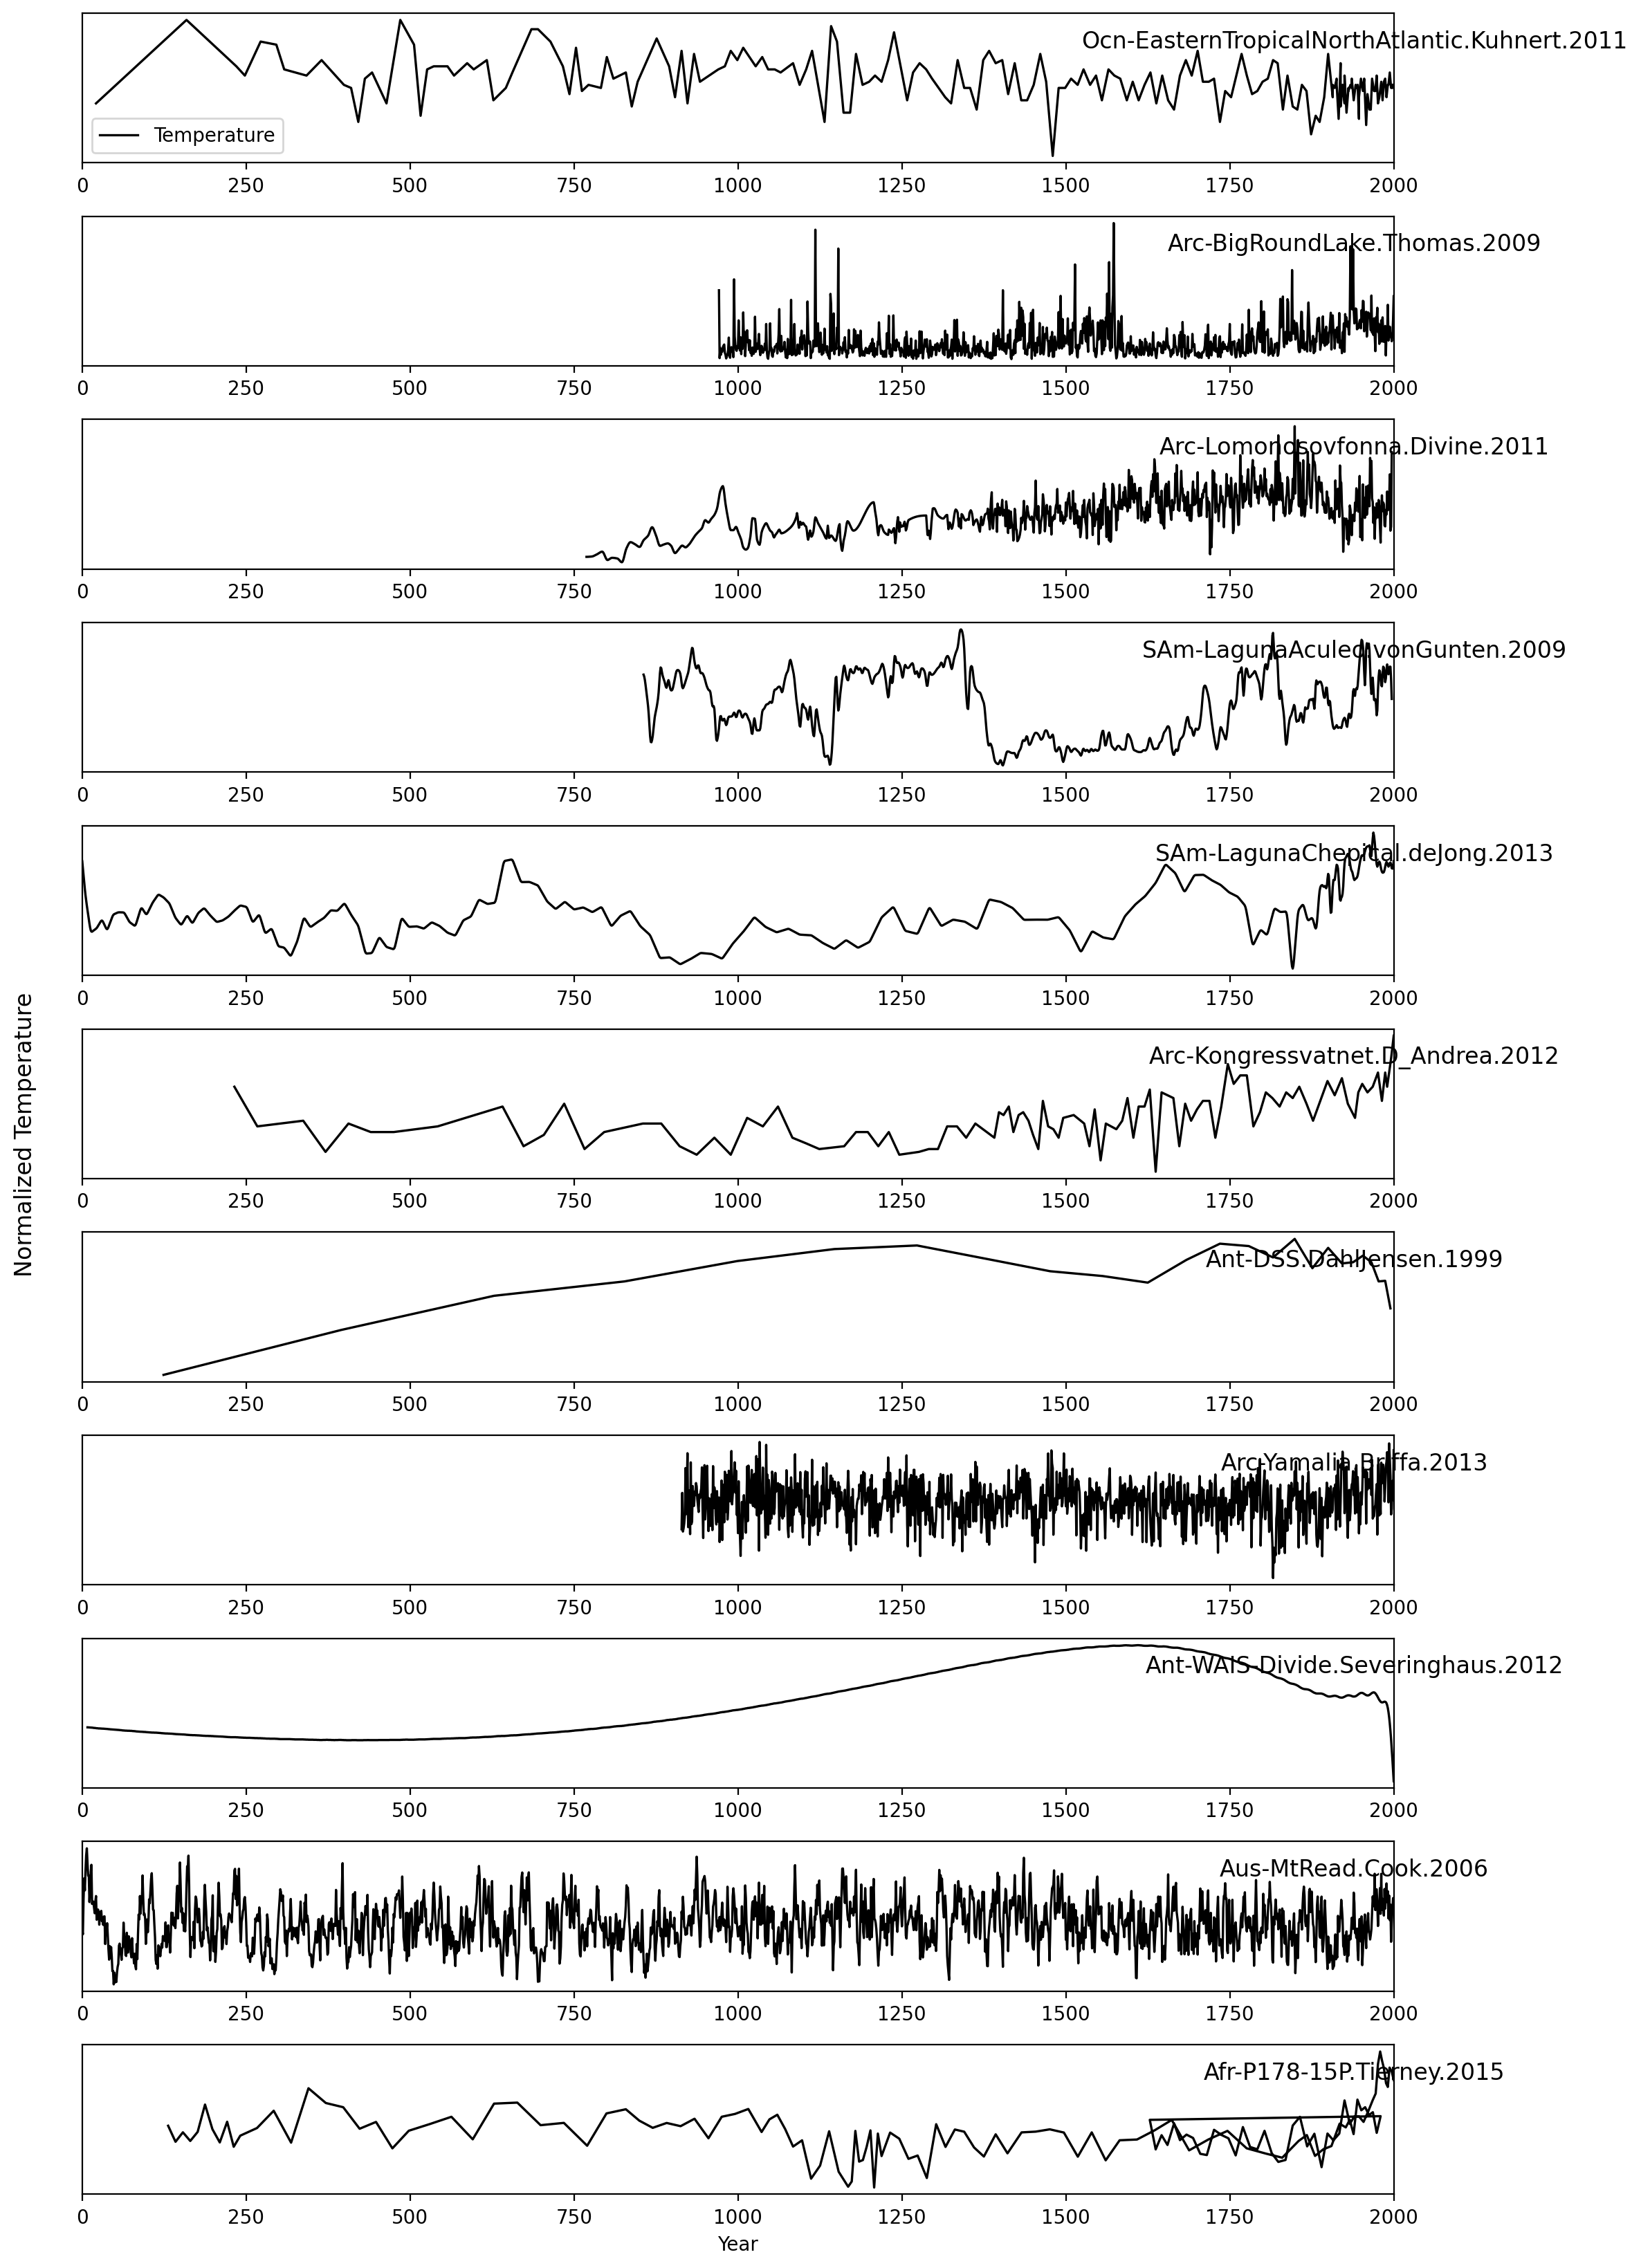

In [43]:
# Define folder path
folder_path = "/content/paleoData_temp_exports1"

# Get list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Normalize and plot temp data
def norm_data_plotter(time, paleoData, title):
    plt.plot(time, paleoData/np.max(paleoData), color='black', linewidth=1.2, label="Temperature")
    plt.title(title, x=0.97, y=0.95, pad=-14)
    plt.xlim(0, 2000)  # Set x-axis limits
    plt.locator_params(axis="y", nbins=3)  # Reduce y-axis ticks
    plt.yticks([])  # Remove y-ticks for individual subplots

# Create a figure with multiple subplots
num_plots = len(csv_files)
fig = plt.figure(figsize=(10, num_plots * 1.5), dpi=200)

# Loop through each dataset and plot
for i, file in enumerate(csv_files):
    df = pd.read_csv(os.path.join(folder_path, file))

    # Ensure proper data types
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df["paleoData_values"] = pd.to_numeric(df["paleoData_values"], errors="coerce")

    # Drop NaN values
    df = df.dropna(subset=["year", "paleoData_values"])

    # Filter data to only include years 0 to 2000
    df = df[(df["year"] >= 0) & (df["year"] <= 2000)]

    # Skip empty datasets after filtering
    if df.empty:
        continue

    # Extract time and paleoData values
    time = df["year"]
    paleoData = df["paleoData_values"]

    # Create subplot
    plt.subplot2grid((num_plots, 1), (i, 0))
    norm_data_plotter(time, paleoData, file.replace(".csv", ""))  # Title = Dataset Name

    # Add legend only to the first subplot
    if i == 0:
        plt.legend(loc="best", ncol=1)

# Add a single y-axis label for all plots
fig.text(-0.03, 0.5, "Normalized Temperature", va="center", rotation="vertical", fontsize=12)

# Add x-axis label
plt.xlabel("Year")

# Adjust layout
fig.tight_layout()
plt.show()

#Clean Data

In [44]:
# Ensure numeric columns
df_temp["year"] = pd.to_numeric(df_temp["year"], errors="coerce")
df_temp["paleoData_values"] = pd.to_numeric(df_temp["paleoData_values"], errors="coerce")

# Filter datasets that include the year 2000
df_2000 = df_temp[df_temp["year"] == 1900]

# Automatically select one dataset per continent
selected_datasets = (
    df_2000.groupby("continent")["dataSetName"]
    .unique()
    .apply(lambda x: x[0] if len(x) > 0 else None)
    .dropna()
    .to_dict()
)

# Create output folder
output_folder = "paleoData_temp_exports2"
os.makedirs(output_folder, exist_ok=True)

# Export each dataset to CSV
for continent, dataset_name in selected_datasets.items():
    # Filter data for the specific dataset
    subset = df_temp[df_temp["dataSetName"] == dataset_name][["year", "paleoData_values"]]

    if subset.empty:
        print(f"Warning: No data found for {dataset_name}. Skipping export.")
        continue

    # Create a valid filename
    safe_filename = "".join(c if c.isalnum() or c in "._-" else "_" for c in dataset_name)

    # Save to CSV
    file_path = os.path.join(output_folder, f"{safe_filename}.csv")
    subset.to_csv(file_path, index=False)

    print(f"Saved: {file_path}")

# List exported files
print(f"Exported files: {os.listdir(output_folder)}")

Saved: paleoData_temp_exports2/Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011.csv
Saved: paleoData_temp_exports2/Ant-DSS.DahlJensen.1999.csv
Saved: paleoData_temp_exports2/Arc-Yamalia.Briffa.2013.csv
Saved: paleoData_temp_exports2/Arc-Lomonosovfonna.Divine.2011.csv
Saved: paleoData_temp_exports2/Arc-BigRoundLake.Thomas.2009.csv
Saved: paleoData_temp_exports2/Aus-MtRead.Cook.2006.csv
Saved: paleoData_temp_exports2/SAm-LagunaAculeo.vonGunten.2009.csv
Exported files: ['Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011.csv', 'Arc-BigRoundLake.Thomas.2009.csv', 'Arc-Lomonosovfonna.Divine.2011.csv', 'SAm-LagunaAculeo.vonGunten.2009.csv', 'SAm-LagunaChepical.deJong.2013.csv', 'Arc-Kongressvatnet.D_Andrea.2012.csv', 'Ant-DSS.DahlJensen.1999.csv', 'Arc-Yamalia.Briffa.2013.csv', 'Ant-WAIS-Divide.Severinghaus.2012.csv', 'Aus-MtRead.Cook.2006.csv', 'Afr-P178-15P.Tierney.2015.csv']


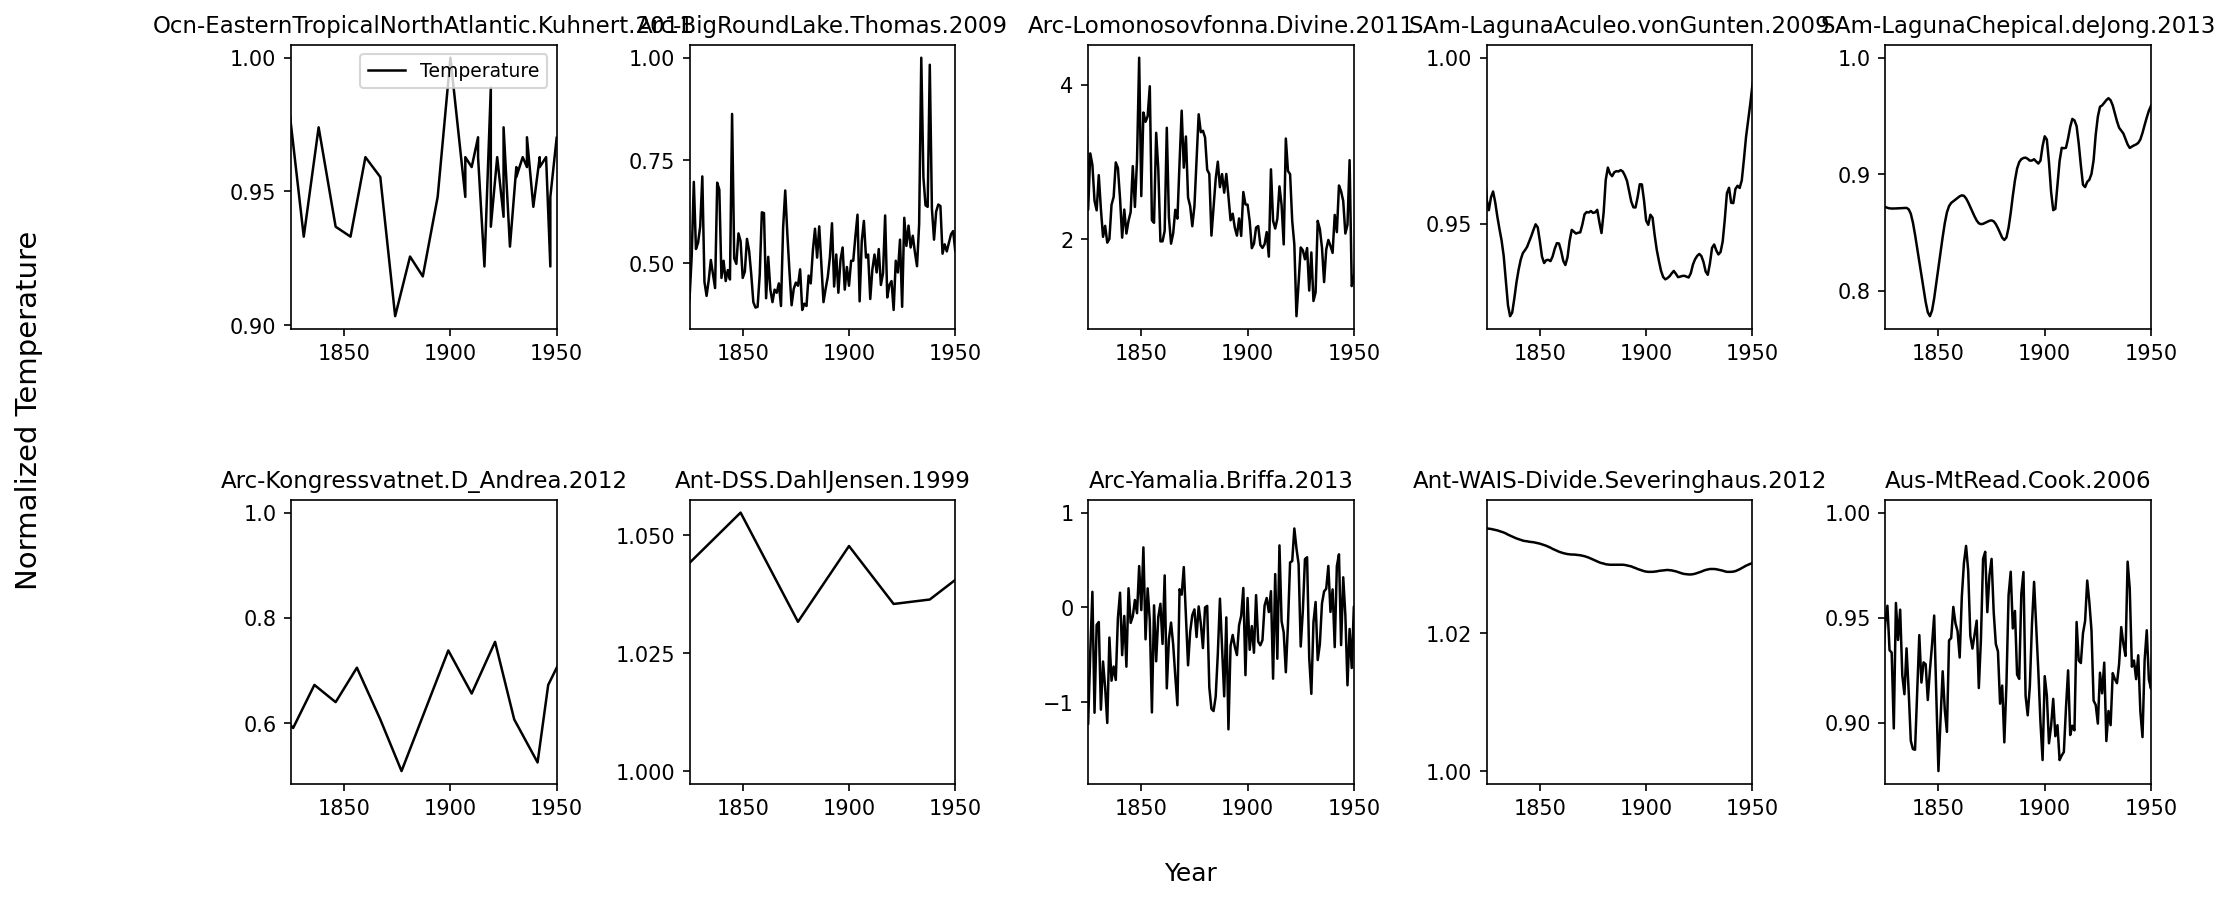

Stored 10 datasets in data_dict dictionary.


In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = "/content/paleoData_temp_exports2"

csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
data_dict = {}

def norm_plot(time, paleoData, title):
    plt.plot(time, paleoData / np.max(paleoData), color="black", linewidth=1.2, label="Temperature")
    plt.title(title, fontsize=11, pad=6)  # Increased title font size
    plt.xlim(1825, 1950)
    plt.locator_params(axis="y", nbins=3)
    plt.yticks(fontsize=10)  # Increased y tick font size
    plt.xticks(fontsize=10)  # Increased x tick font size

# Set 5 columns
ncols = 5
num_plots = len(csv_files)
nrows = int(np.ceil(num_plots / ncols))

# Larger figure size for better clarity
fig = plt.figure(figsize=(ncols * 3.2, nrows * 3.2), dpi=150)

for i, file in enumerate(csv_files):
    df = pd.read_csv(os.path.join(folder_path, file))

    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df["paleoData_values"] = pd.to_numeric(df["paleoData_values"], errors="coerce")
    df = df.dropna(subset=["year", "paleoData_values"])
    df = df[(df["year"] >= 1800) & (df["year"] <= 2000)]

    if df.empty:
        continue

    dataset_name = file.replace(".csv", "")
    data_dict[dataset_name] = df

    time = df["year"]
    paleoData = df["paleoData_values"]

    # Subplot
    plt.subplot(nrows, ncols, i + 1)
    norm_plot(time, paleoData, dataset_name)

    if i == 0:
        plt.legend(loc="upper right", fontsize=9)

# Global axis labels with increased font size
fig.text(0.01, 0.5, "Normalized Temperature", va="center", rotation="vertical", fontsize=14)
fig.text(0.5, 0.01, "Year", ha="center", fontsize=12)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.6, wspace=0.5)

plt.show()
print(f"Stored {len(data_dict)} datasets in data_dict dictionary.")

In [55]:
# Load exported datasets into a dictionary
data_dict = {}
for filename in os.listdir(output_folder):
    if filename.endswith(".csv"):
        dataset_name = filename.replace(".csv", "").replace("_", ".")  # Restore original name format
        file_path = os.path.join(output_folder, filename)
        data_dict[dataset_name] = pd.read_csv(file_path)

# Define a mapping from dataset name prefix to variable prefix
prefix_map = {
    "Arc": "arc",
    "NAm": "nam",
    "Aus": "aus",
    "Eur": "eur",
    "Asi": "asi",
    "SAm": "sam",
    "Afr": "afr",
    "Ant": "ant",
    "Ocn": "ocn"
}

# Initialize counters for each prefix
var_counters = {v: 1 for v in prefix_map.values()}

# Dynamically assign variables
for dataset_name in data_dict:
    prefix_key = dataset_name.split("-")[0]
    var_prefix = prefix_map.get(prefix_key)

    if var_prefix:
        var_number = var_counters[var_prefix]
        var_name = f"{var_prefix}{var_number}"
        globals()[var_name] = data_dict[dataset_name]
        var_counters[var_prefix] += 1
        print(f"{var_name} = data_dict['{dataset_name}']")
    else:
        print(f"# Skipped: {dataset_name} (unknown prefix)")

ocn1 = data_dict['Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011']
arc1 = data_dict['Arc-BigRoundLake.Thomas.2009']
arc2 = data_dict['Arc-Lomonosovfonna.Divine.2011']
sam1 = data_dict['SAm-LagunaAculeo.vonGunten.2009']
sam2 = data_dict['SAm-LagunaChepical.deJong.2013']
arc3 = data_dict['Arc-Kongressvatnet.D.Andrea.2012']
ant1 = data_dict['Ant-DSS.DahlJensen.1999']
arc4 = data_dict['Arc-Yamalia.Briffa.2013']
ant2 = data_dict['Ant-WAIS-Divide.Severinghaus.2012']
aus1 = data_dict['Aus-MtRead.Cook.2006']


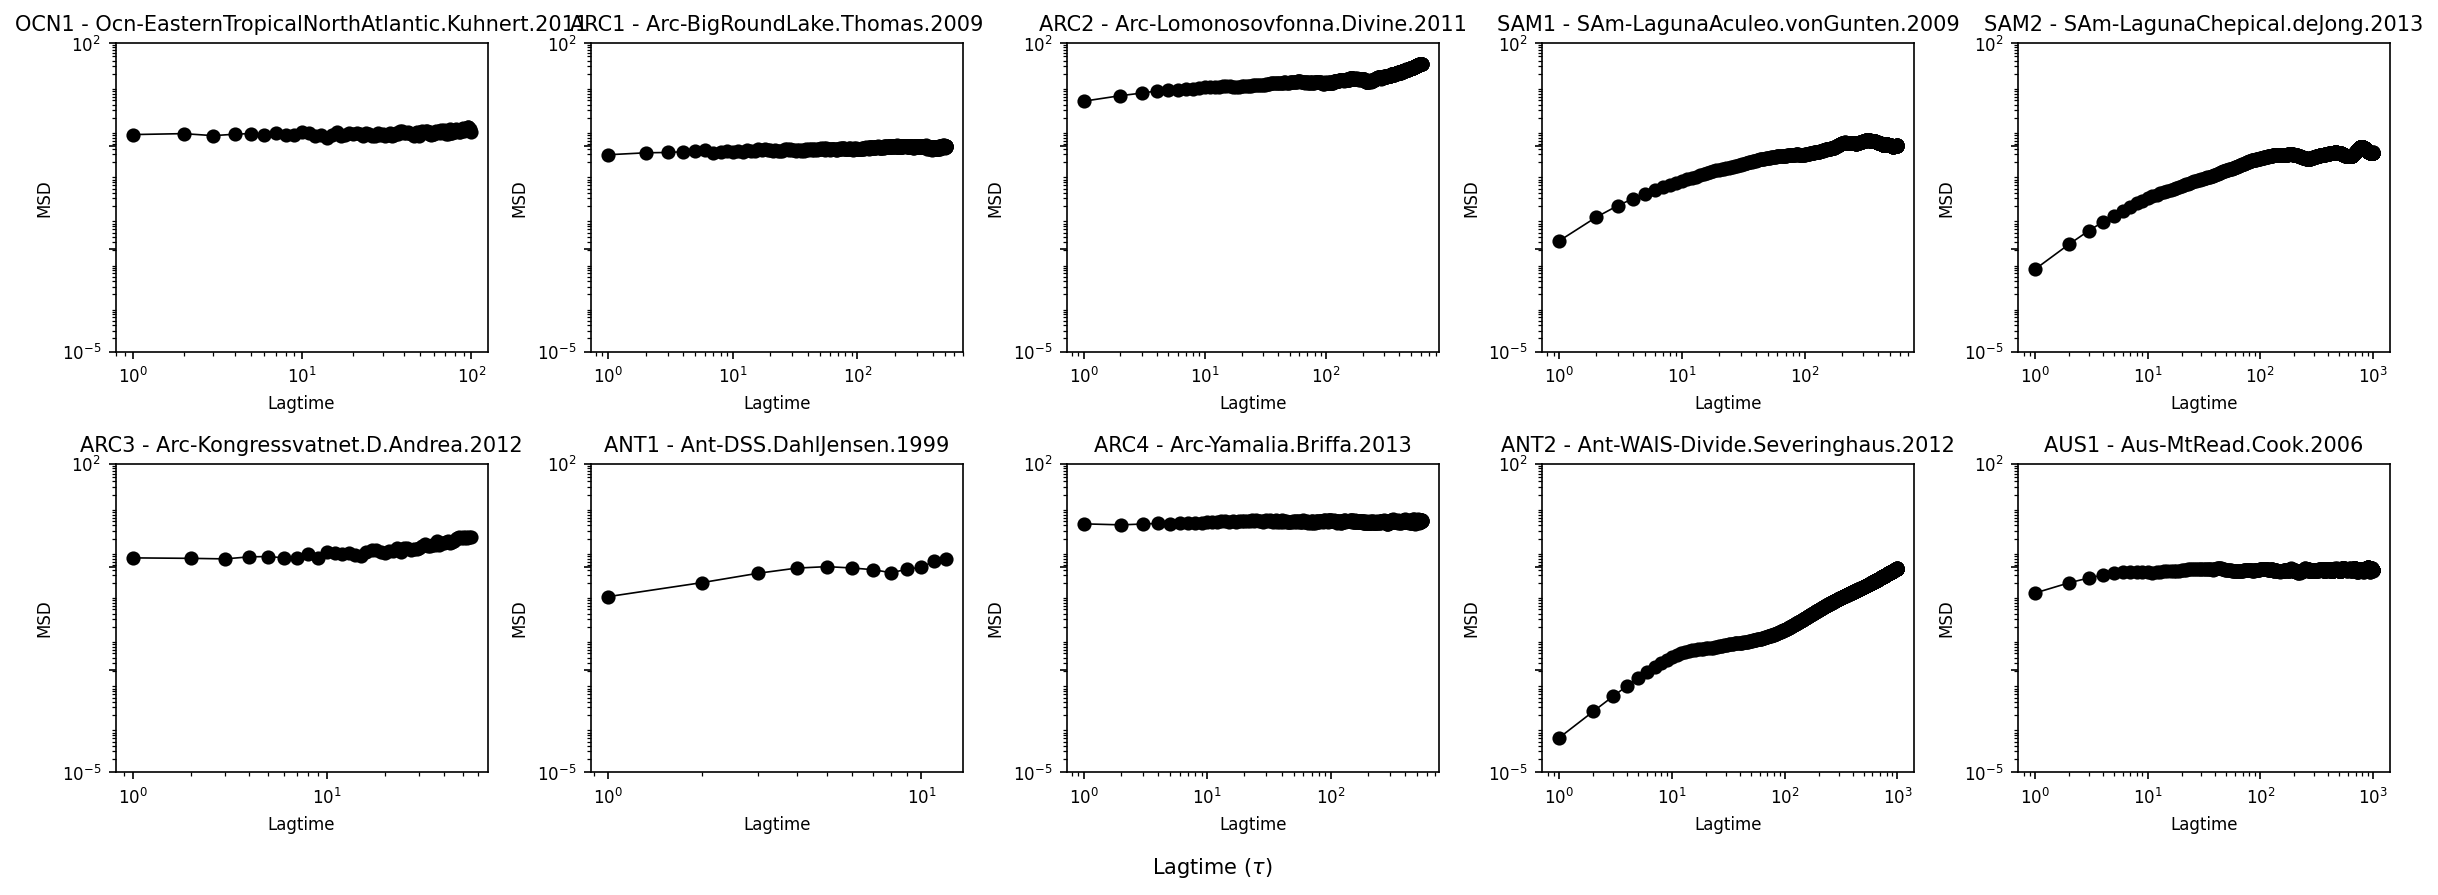

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load exported datasets ---
output_folder = "paleoData_temp_exports2"
data_dict = {}
for filename in os.listdir(output_folder):
    if filename.endswith(".csv"):
        dataset_name = filename.replace(".csv", "").replace("_", ".")
        file_path = os.path.join(output_folder, filename)
        data_dict[dataset_name] = pd.read_csv(file_path)

# --- Assign variables like arc1, eur1, etc. ---
prefix_map = {
    "Arc": "arc",
    "NAm": "nam",
    "Aus": "aus",
    "Eur": "eur",
    "Asi": "asi",
    "SAm": "sam",
    "Afr": "afr",
    "Ant": "ant",
    "Ocn": "ocn"
}
var_counters = {v: 1 for v in prefix_map.values()}
datasets = {}

for dataset_name in data_dict:
    prefix_key = dataset_name.split("-")[0]
    var_prefix = prefix_map.get(prefix_key)

    if var_prefix:
        var_number = var_counters[var_prefix]
        var_name = f"{var_prefix}{var_number}"
        globals()[var_name] = data_dict[dataset_name]
        datasets[f"{var_prefix.upper()}{var_number} - {dataset_name}"] = data_dict[dataset_name]
        var_counters[var_prefix] += 1

# --- MSD Calculation Functions ---
def msd(df, column_number, T):
    col = df.iloc[:, column_number]
    col_diff = col.diff(periods=T)
    col_diff_flat = col_diff.to_numpy().flatten()
    col_diff_flat_clean = np.square(col_diff_flat[~np.isnan(col_diff_flat)])
    return np.sum(col_diff_flat_clean) / len(col_diff_flat_clean) if len(col_diff_flat_clean) > 0 else np.nan

def compute_msd(time_series):
    df = pd.DataFrame({"ts": time_series})
    N = len(time_series)
    T = N // 2
    T_new = np.arange(1, T + 1)
    MSD = [msd(df, 0, int(i)) for i in T_new]
    return pd.DataFrame({"lagtime": T_new, "MSD": MSD})

# --- Compute MSD for each dataset ---
msd_dataframes = {}

for name, df in datasets.items():
    paleo_values = df["paleoData_values"].dropna().values
    if len(paleo_values) > 1:
        msd_dataframes[name] = compute_msd(paleo_values)

# --- Determine global y-axis range ---
all_msd_values = np.concatenate([df["MSD"].dropna().values for df in msd_dataframes.values()])
ymin = 10 ** np.floor(np.log10(np.min(all_msd_values)))
ymax = 10 ** np.ceil(np.log10(np.max(all_msd_values)))
yticks = np.logspace(np.log10(ymin), np.log10(ymax), num=4)

# --- Plotting in 5 columns with shared y-axis scale ---
num_plots = len(msd_dataframes)
ncols = 5
nrows = int(np.ceil(num_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 3.2, nrows * 3), dpi=150)
axes = axes.flatten()

for i, (name, msd_df) in enumerate(msd_dataframes.items()):
    T_new = msd_df["lagtime"].values
    MSD = msd_df["MSD"].values
    axes[i].scatter(T_new, MSD, color="black", linewidth=0.8, label="MSD Data")
    axes[i].plot(T_new, MSD, color="black", linestyle="-", linewidth=0.8)
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
    axes[i].set_title(name, fontsize=10)
    axes[i].set_ylabel("MSD", fontsize=8)
    axes[i].set_xlabel("Lagtime", fontsize=8)
    axes[i].tick_params(axis="both", which="both", labelsize=8)

    # Set consistent y-limits and ticks
    axes[i].set_ylim([ymin, ymax])
    axes[i].set_yticks(yticks)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global x-axis label
fig.text(0.5, 0.02, "Lagtime ($\\tau$)", ha="center", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

# **Theoretical PDF and MSD for exponential memory function**

### **Probability Density Function (PDF):**

$$P(x_T, T; x_0, 0) = \frac{\beta^{\mu/2} e^{\beta / 2T}}{\sqrt{2\pi \Gamma(\mu) T^{\mu -1}}}
\exp \left( -\frac{\beta^\mu e^{\beta / T} (x_T - x_0)^2}{2 \Gamma(\mu) T^{\mu -1}} \right)$$

### **Mean Squared Displacement (MSD):**

$$\text{MSD} = \frac{\Gamma(\mu) T^{\mu -1}}{\beta^\mu e^{\beta / T}}$$


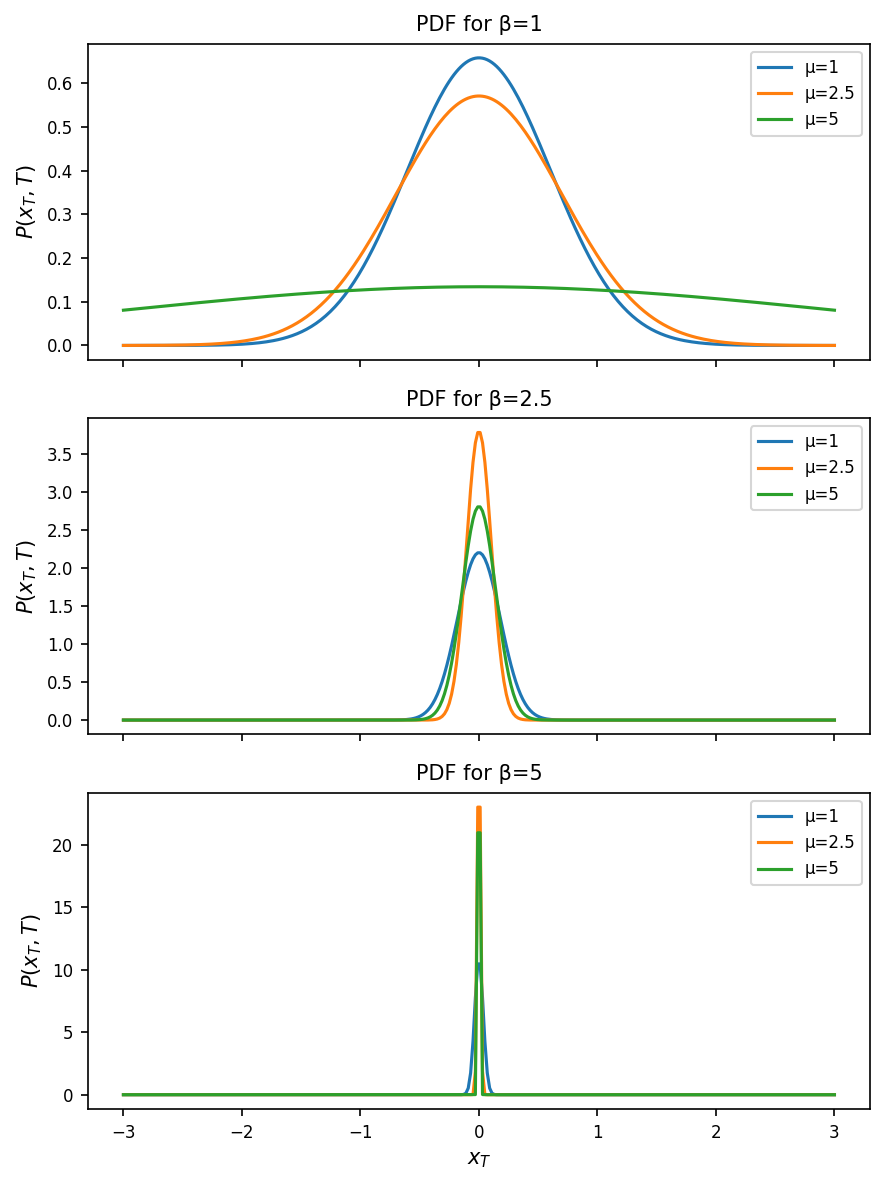

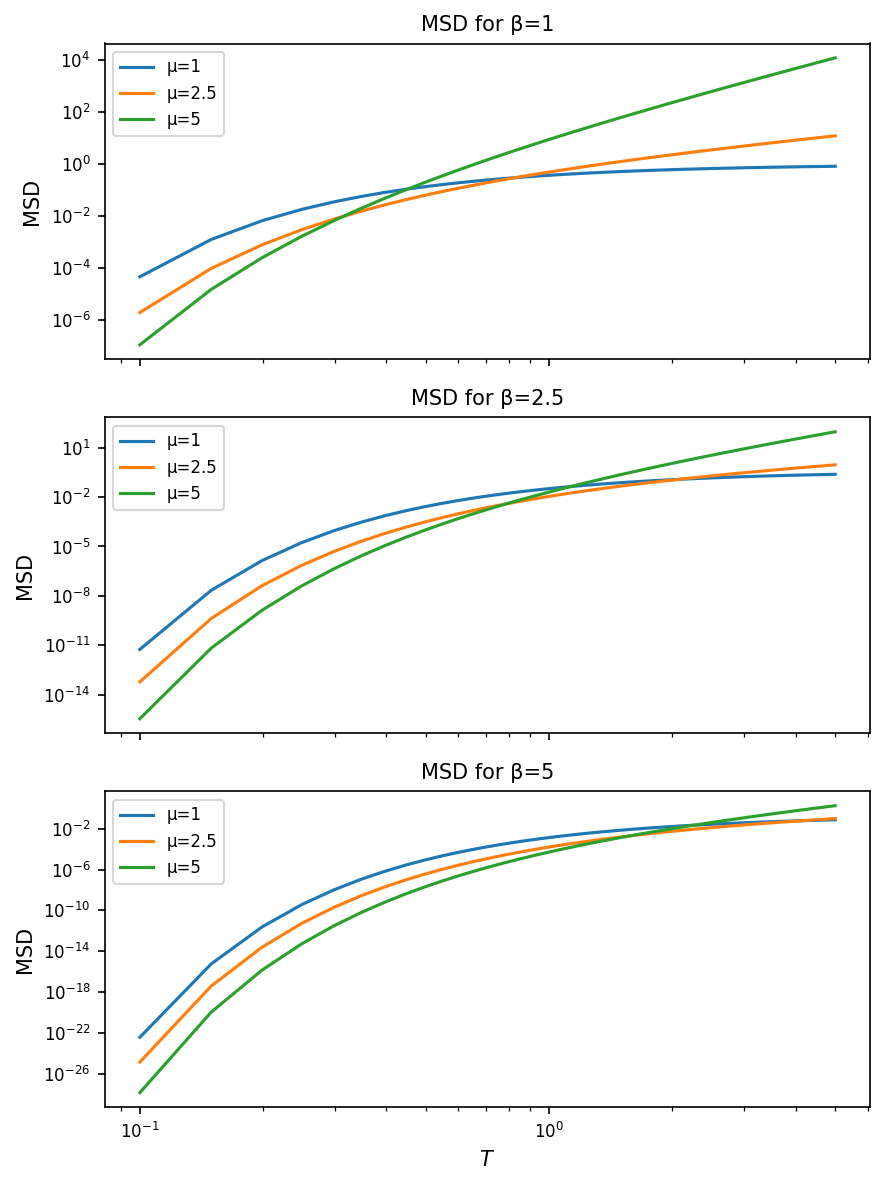

In [59]:
def pdf(x_T, T, mu, beta):
    gamma_mu = sp.gamma(mu)
    prefactor = (beta**(mu/2) * np.exp(beta / (2*T))) / np.sqrt(2 * np.pi * gamma_mu * T**(mu - 1))
    exponent = - (beta**mu * np.exp(beta / T) * (x_T**2) / (2 * gamma_mu * T**(mu - 1)))
    return prefactor * np.exp(exponent)

def msd(T, mu, beta):
    if np.any(T <= 0) or beta <= 0 or mu <= 0:
        return np.full_like(T, np.nan)

    gamma_mu = sp.gamma(mu)
    if np.isnan(gamma_mu) or np.isinf(gamma_mu):
        return np.full_like(T, np.nan)

    return (gamma_mu * T**(mu - 1)) / (beta**mu * np.exp(beta / T))

x_T_values = np.linspace(-3, 3, 300)
T_values = np.linspace(0.1, 5, 100)

beta_values = [1, 2.5, 5]
mu_values = [1, 2.5, 5]

fig, axes = plt.subplots(len(beta_values), 1, figsize=(6, 8), dpi=150, sharex=True)

for i, beta in enumerate(beta_values):
    ax = axes[i]
    for mu in mu_values:
        pdf_values = pdf(x_T_values, T=1, mu=mu, beta=beta)
        ax.plot(x_T_values, pdf_values, label=f"μ={mu}")

    ax.set_ylabel(r"$P(x_T, T)$", fontsize=10)
    ax.set_title(f"PDF for β={beta}", fontsize=10)
    ax.legend(fontsize=8, loc="best")
    ax.tick_params(axis="both", which="major", labelsize=8)

axes[-1].set_xlabel(r"$x_T$", fontsize=10)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(len(beta_values), 1, figsize=(6, 8), dpi=150, sharex=True)

for i, beta in enumerate(beta_values):
    ax = axes[i]
    for mu in mu_values:
        msd_values = msd(T_values, mu, beta)
        ax.loglog(T_values, msd_values, label=f"μ={mu}")

    ax.set_ylabel("MSD", fontsize=10)
    ax.set_title(f"MSD for β={beta}", fontsize=10)
    ax.legend(fontsize=8, loc="best")
    ax.tick_params(axis="both", which="major", labelsize=8)

axes[-1].set_xlabel(r"$T$", fontsize=10)
fig.tight_layout()
plt.show()

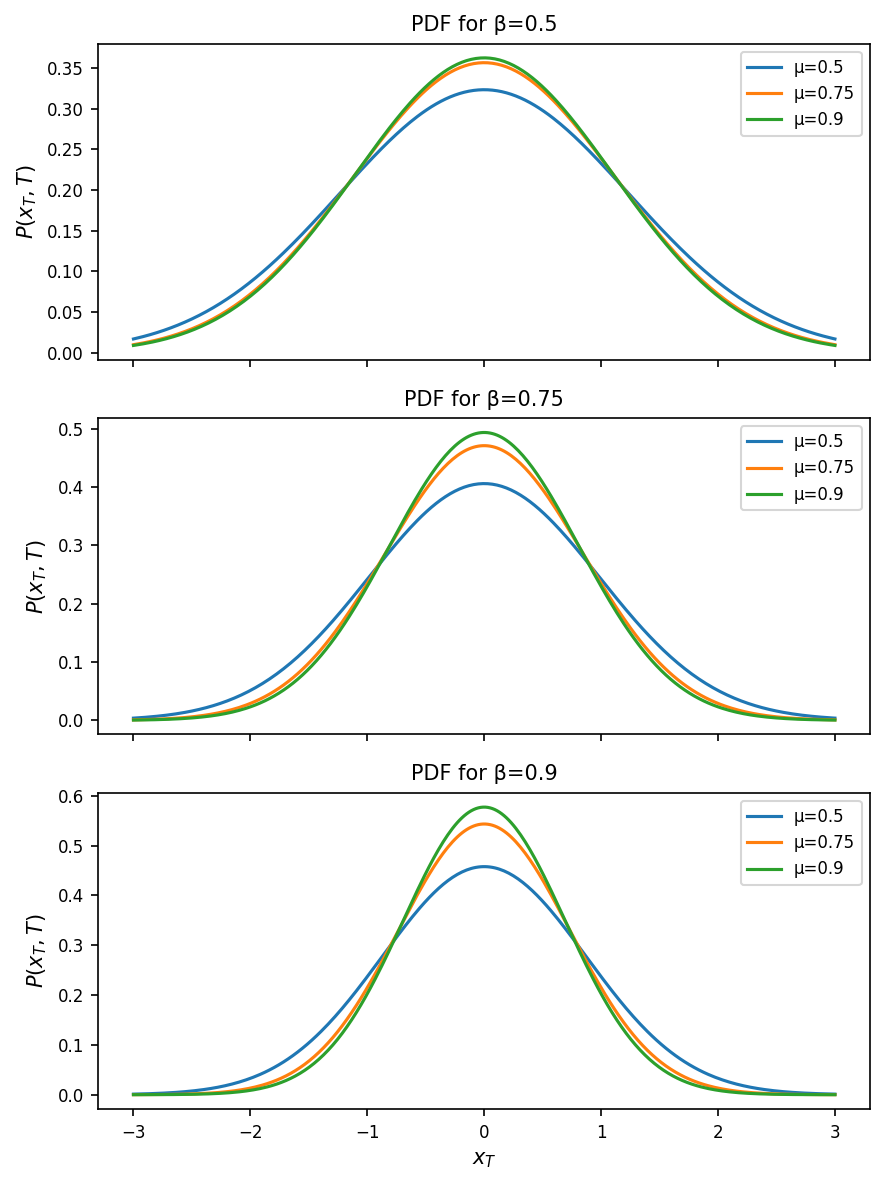

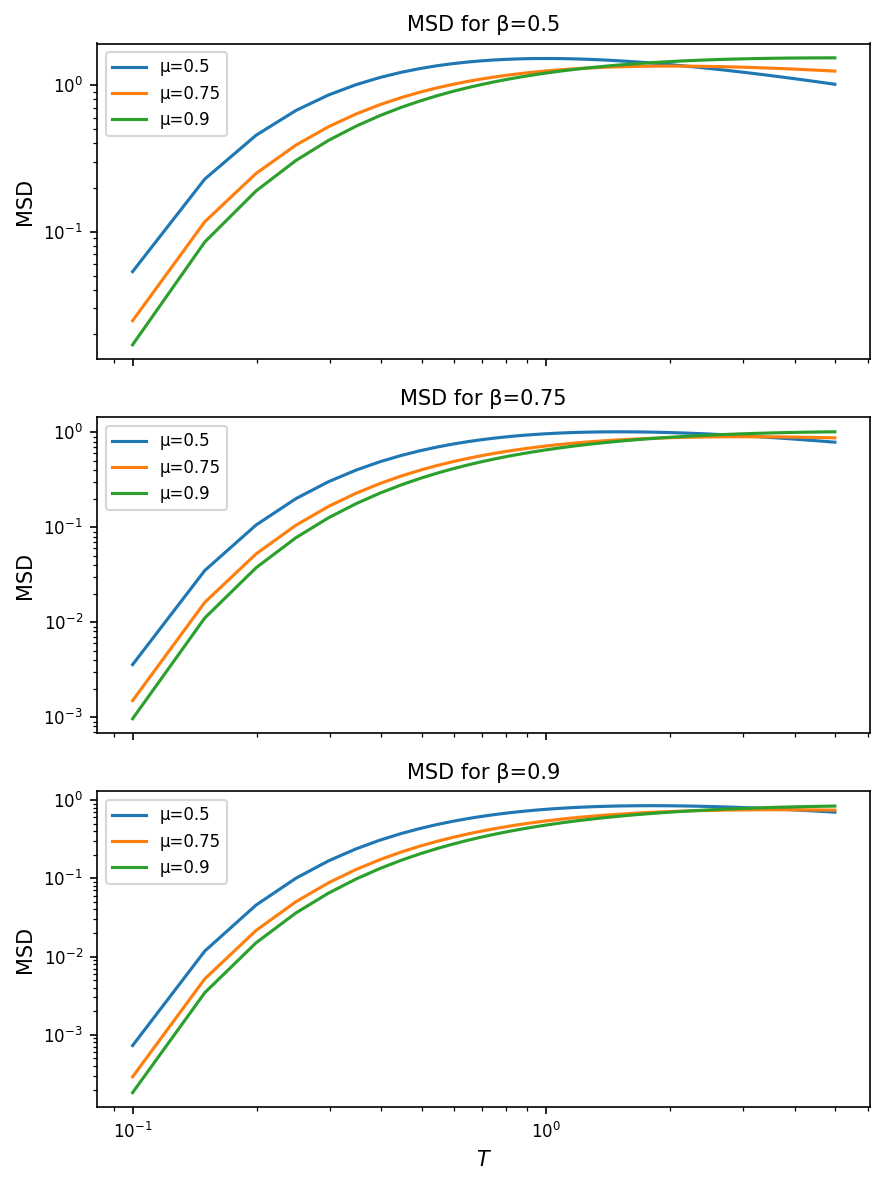

In [60]:
def pdf(x_T, T, mu, beta):
    gamma_mu = sp.gamma(mu)
    prefactor = (beta**(mu/2) * np.exp(beta / (2*T))) / np.sqrt(2 * np.pi * gamma_mu * T**(mu - 1))
    exponent = - (beta**mu * np.exp(beta / T) * (x_T**2) / (2 * gamma_mu * T**(mu - 1)))
    return prefactor * np.exp(exponent)

def msd(T, mu, beta):
    if np.any(T <= 0) or beta <= 0 or mu <= 0:
        return np.full_like(T, np.nan)

    gamma_mu = sp.gamma(mu)
    if np.isnan(gamma_mu) or np.isinf(gamma_mu):
        return np.full_like(T, np.nan)

    return (gamma_mu * T**(mu - 1)) / (beta**mu * np.exp(beta / T))

x_T_values = np.linspace(-3, 3, 300)
T_values = np.linspace(0.1, 5, 100)

beta_values = [0.5, 0.75, 0.9]
mu_values = [0.5, 0.75, 0.9]

fig, axes = plt.subplots(len(beta_values), 1, figsize=(6, 8), dpi=150, sharex=True)

for i, beta in enumerate(beta_values):
    ax = axes[i]
    for mu in mu_values:
        pdf_values = pdf(x_T_values, T=1, mu=mu, beta=beta)
        ax.plot(x_T_values, pdf_values, label=f"μ={mu}")

    ax.set_ylabel(r"$P(x_T, T)$", fontsize=10)
    ax.set_title(f"PDF for β={beta}", fontsize=10)
    ax.legend(fontsize=8, loc="best")
    ax.tick_params(axis="both", which="major", labelsize=8)

axes[-1].set_xlabel(r"$x_T$", fontsize=10)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(len(beta_values), 1, figsize=(6, 8), dpi=150, sharex=True)

for i, beta in enumerate(beta_values):
    ax = axes[i]
    for mu in mu_values:
        msd_values = msd(T_values, mu, beta)
        ax.loglog(T_values, msd_values, label=f"μ={mu}")

    ax.set_ylabel("MSD", fontsize=10)
    ax.set_title(f"MSD for β={beta}", fontsize=10)
    ax.legend(fontsize=8, loc="best")
    ax.tick_params(axis="both", which="major", labelsize=8)

axes[-1].set_xlabel(r"$T$", fontsize=10)
fig.tight_layout()
plt.show()

In [61]:
def msd_fit_datasets(msd_dataframes,
                     vertical_multiplier=1.1,
                     horizontal_divider=2.0,
                     mu_initial=1.0, mu_min=0.001, mu_max=100.0,
                     beta_initial=1.0, beta_min=0.001, beta_max=100.0):
    fitted_parameters = {}
    msd_fit_curves = {}
    fit_details = {}

    for dataset_name, df in msd_dataframes.items():
        lag_raw = df["lagtime"].values
        msd_raw = df["MSD"].values

        valid = ~np.isnan(msd_raw)
        lag_raw = lag_raw[valid]
        msd_raw = msd_raw[valid]

        model_instance = Model(msd, independent_vars=["T"])
        initial_params = model_instance.make_params(
            mu=mu_initial,
            beta=beta_initial
        )

        # Set parameter constraints
        initial_params['mu'].set(min=mu_min, max=mu_max)
        initial_params['beta'].set(min=beta_min, max=beta_max)

        try:
            fit_result = model_instance.fit(msd_raw, initial_params, T=lag_raw)

            fitted_parameters[dataset_name] = fit_result.best_values
            msd_fit_curves[dataset_name] = fit_result.best_fit

            # Store additional fit details
            fit_details[dataset_name] = {
                'initial_params': initial_params,
                'fit_report': fit_result.fit_report(),
                'chi_square': fit_result.chisqr,
                'reduced_chi_square': fit_result.redchi
            }

        except ValueError as e:
            print(f"Fit failed for {dataset_name}: {e}")
            continue

    return fitted_parameters, msd_fit_curves, fit_details

def plot_msd_fit(dataset_name, lag_raw, msd_raw, fit_curve,
                 vertical_multiplier=1.0, horizontal_divider=1.0):

    global lag_modified, msd_modified
    mu_fit = fitted_parameters[dataset_name]['mu']
    beta_fit = fitted_parameters[dataset_name]['beta']

    lag_modified = lag_raw / horizontal_divider
    msd_modified = msd_raw * vertical_multiplier
    fit_curve_modified = fit_curve * vertical_multiplier

    plt.figure(figsize=(10, 5))
    plt.scatter(lag_modified, msd_modified, color="black", alpha=0.6, label="MSD Data")
    plt.plot(lag_modified, fit_curve_modified, 'r--', linewidth=2, label="Fitted Model")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"MSD Fit - {dataset_name}", fontsize=14)
    plt.xlabel("Lag Time ($\\tau$)", fontsize=14)
    plt.ylabel("MSD", fontsize=14)
    plt.legend(fontsize=12)

    param_info = f"μ = {mu_fit:.2f}\nβ = {beta_fit:.2f}"
    plt.text(0.05, 0.8, param_info, transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

def recompute_fits(mu_initial=1.0, mu_min=0.001, mu_max=100.0,
                   beta_initial=1.0, beta_min=0.001, beta_max=100.0):
    global fitted_parameters, msd_fit_curves, fit_details
    fitted_parameters, msd_fit_curves, fit_details = msd_fit_datasets(
        msd_dataframes,
        mu_initial=mu_initial, mu_min=mu_min, mu_max=mu_max,
        beta_initial=beta_initial, beta_min=beta_min, beta_max=beta_max
    )

    print("\nUpdated Fitted Parameters:")
    for name, params in fitted_parameters.items():
        print(f"{name}: μ = {params['mu']:.3f}, β = {params['beta']:.3f}")

def plot_selected_dataset(dataset_name,
                          vertical_multiplier=1.0,
                          horizontal_divider=1.0):
    df = msd_dataframes[dataset_name]

    # Filter NaNs from MSD
    msd_raw = df["MSD"].values
    valid = ~np.isnan(msd_raw)
    msd_raw = msd_raw[valid]

    # Integer lag time starting from 1, matching filtered MSD
    lag_raw = np.arange(1, len(msd_raw) + 1)

    # Now pass lag_raw and msd_raw directly
    plot_msd_fit(dataset_name, lag_raw, msd_raw, msd_fit_curves[dataset_name],
                 vertical_multiplier, horizontal_divider)

    params = fitted_parameters[dataset_name]

    print(f"\nDetailed Fitting Parameters for {dataset_name}:")
    print(f"μ (mu)       = {params['mu']:.4f}")
    print(f"β (beta)     = {params['beta']:.4f}")

    if dataset_name in fit_details:
        details = fit_details[dataset_name]
        print("\nFit Details:")
        print(f"Chi-Square        = {details['chi_square']:.4f}")
        print(f"Reduced Chi-Square = {details['reduced_chi_square']:.4f}")

    return params

fitted_parameters, msd_fit_curves, fit_details = msd_fit_datasets(msd_dataframes)

print("\nAll Fitted Parameters:")
for name, params in fitted_parameters.items():
    print(f"{name}: μ = {params['mu']:.3f}, β = {params['beta']:.3f}")


All Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354



Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


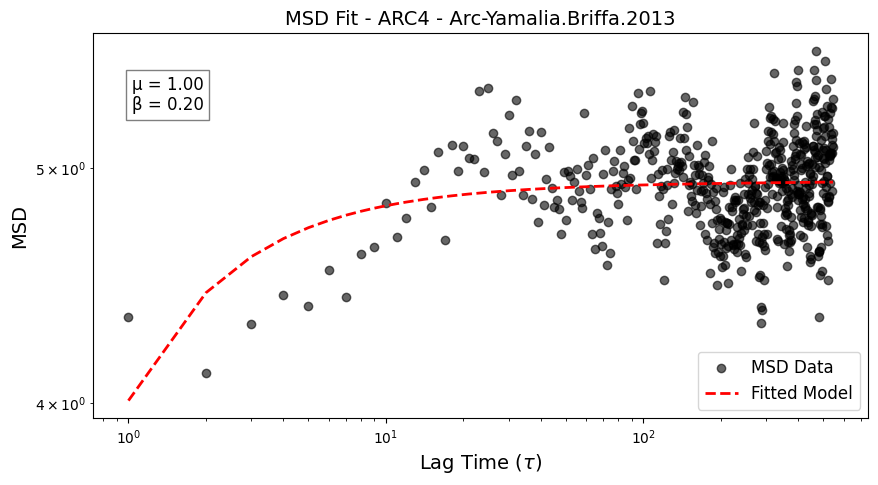


Detailed Fitting Parameters for ARC4 - Arc-Yamalia.Briffa.2013:
μ (mu)       = 1.0006
β (beta)     = 0.2036

Fit Details:
Chi-Square        = 24.7142
Reduced Chi-Square = 0.0455


{'mu': np.float64(1.0006072263807524), 'beta': np.float64(0.2035995594758247)}

In [62]:
recompute_fits(mu_initial=1.0, mu_min=0.001, mu_max=3.0)
plot_selected_dataset('ARC4 - Arc-Yamalia.Briffa.2013', vertical_multiplier=1.0, horizontal_divider=1.0)

In [63]:
recompute_fits(mu_initial=0.0001, mu_min=0.0001, mu_max=1.0, beta_max=5.0)
plot_selected_dataset('AFR1 - Afr-P178-15P.Tierney.2015', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 0.042, β = 5.000
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 0.064, β = 5.000
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 0.002, β = 5.000
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 0.090, β = 5.000
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.000, β = 3.277
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 0.038, β = 5.000
ANT1 - Ant-DSS.DahlJensen.1999: μ = 0.143, β = 5.000
ARC4 - Arc-Yamalia.Briffa.2013: μ = 0.005, β = 5.000
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 1.000, β = 5.000
AUS1 - Aus-MtRead.Cook.2006: μ = 0.058, β = 5.000


KeyError: 'AFR1 - Afr-P178-15P.Tierney.2015'


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.043
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.365
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.494, β = 0.812
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.951
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.061
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.455, β = 1.962
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.638
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


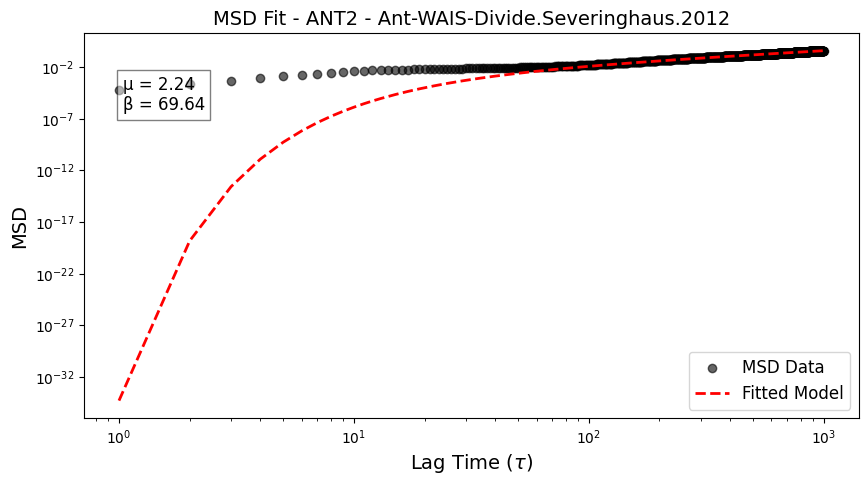


Detailed Fitting Parameters for ANT2 - Ant-WAIS-Divide.Severinghaus.2012:
μ (mu)       = 2.2443
β (beta)     = 69.6378

Fit Details:
Chi-Square        = 0.0257
Reduced Chi-Square = 0.0000


{'mu': np.float64(2.2443338309763203), 'beta': np.float64(69.6377661015622)}

In [64]:
recompute_fits(mu_initial=0.01, mu_min=0.01, mu_max=3.0, beta_max=100.0)
plot_selected_dataset('ANT2 - Ant-WAIS-Divide.Severinghaus.2012', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.000, β = 1.000
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.000, β = 1.000
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.000, β = 1.000
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.106, β = 1.816
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 1.000, β = 1.000
AUS1 - Aus-MtRead.Cook.2006: μ = 1.000, β = 1.000


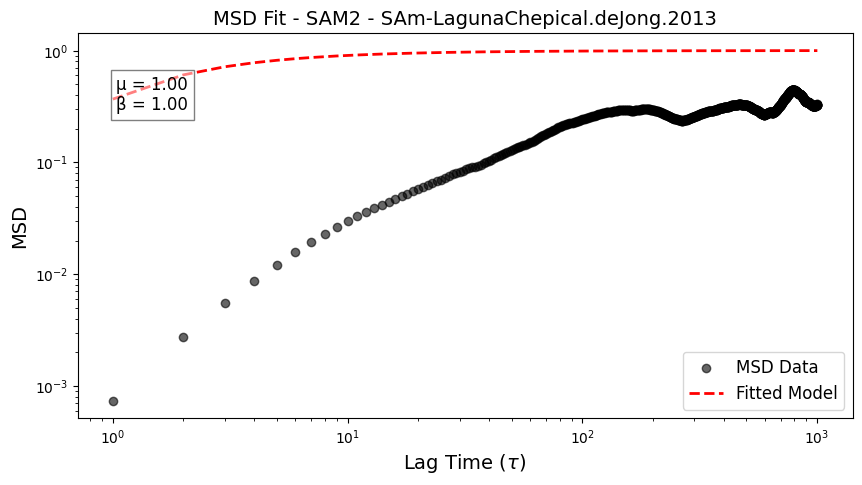


Detailed Fitting Parameters for SAM2 - SAm-LagunaChepical.deJong.2013:
μ (mu)       = 1.0000
β (beta)     = 1.0000

Fit Details:
Chi-Square        = 488.0490
Reduced Chi-Square = 0.4876


{'mu': np.float64(1.0), 'beta': np.float64(1.0)}

In [65]:
recompute_fits(mu_initial=1.0, mu_min=1.0, mu_max=7.0, beta_max=8.0)
plot_selected_dataset('SAM2 - SAm-LagunaChepical.deJong.2013', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


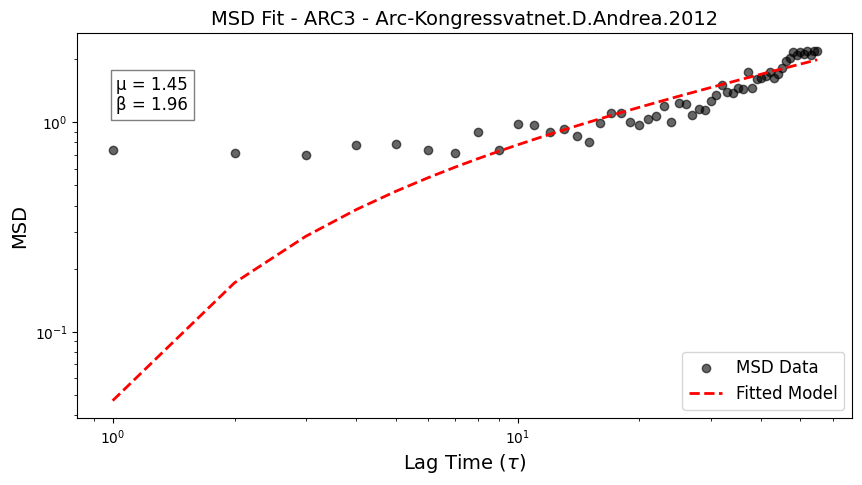


Detailed Fitting Parameters for ARC3 - Arc-Kongressvatnet.D.Andrea.2012:
μ (mu)       = 1.4540
β (beta)     = 1.9588

Fit Details:
Chi-Square        = 2.6151
Reduced Chi-Square = 0.0493


{'mu': np.float64(1.4539525247874714), 'beta': np.float64(1.9588384998081014)}

In [66]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('ARC3 - Arc-Kongressvatnet.D.Andrea.2012', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


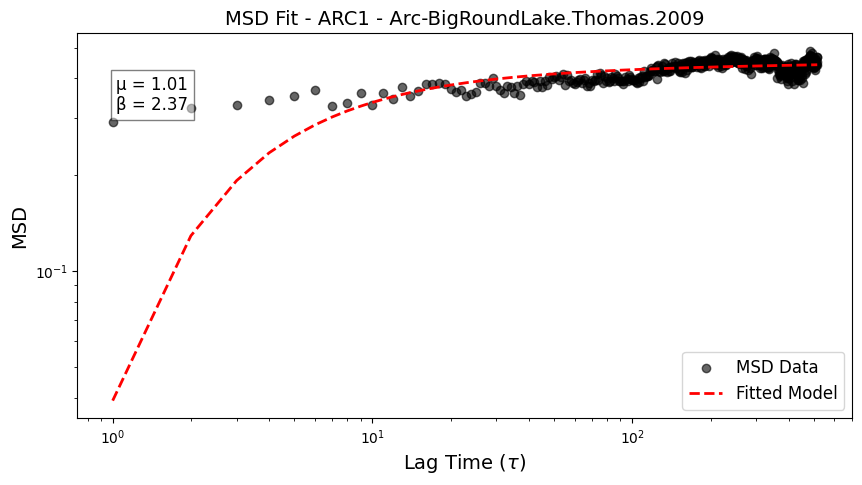


Detailed Fitting Parameters for ARC1 - Arc-BigRoundLake.Thomas.2009:
μ (mu)       = 1.0100
β (beta)     = 2.3655

Fit Details:
Chi-Square        = 0.3587
Reduced Chi-Square = 0.0007


{'mu': np.float64(1.0100446879078233), 'beta': np.float64(2.365531039833273)}

In [67]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('ARC1 - Arc-BigRoundLake.Thomas.2009', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


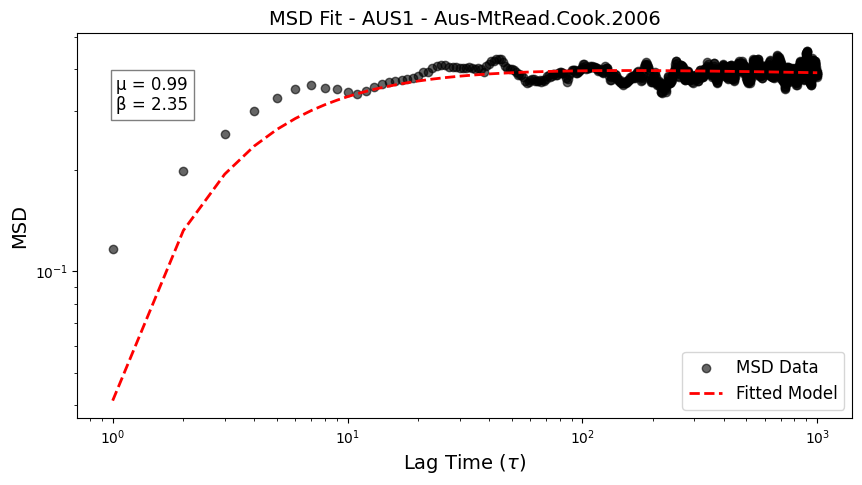


Detailed Fitting Parameters for AUS1 - Aus-MtRead.Cook.2006:
μ (mu)       = 0.9851
β (beta)     = 2.3537

Fit Details:
Chi-Square        = 0.3911
Reduced Chi-Square = 0.0004


{'mu': np.float64(0.9850570346129685), 'beta': np.float64(2.3537428841616834)}

In [68]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('AUS1 - Aus-MtRead.Cook.2006', vertical_multiplier=1.0, horizontal_divider=1.0)

# **%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


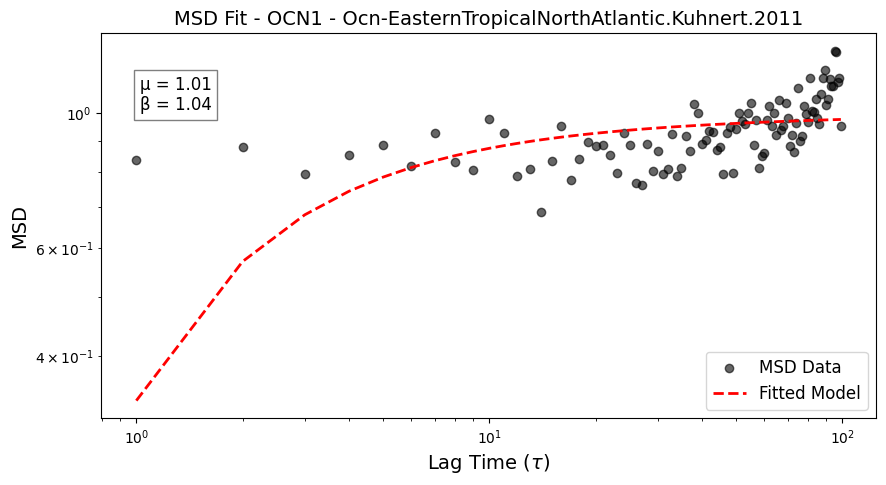


Detailed Fitting Parameters for OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011:
μ (mu)       = 1.0067
β (beta)     = 1.0413

Fit Details:
Chi-Square        = 1.3433
Reduced Chi-Square = 0.0138


{'mu': np.float64(1.0066885515815696), 'beta': np.float64(1.041280000657281)}

In [69]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


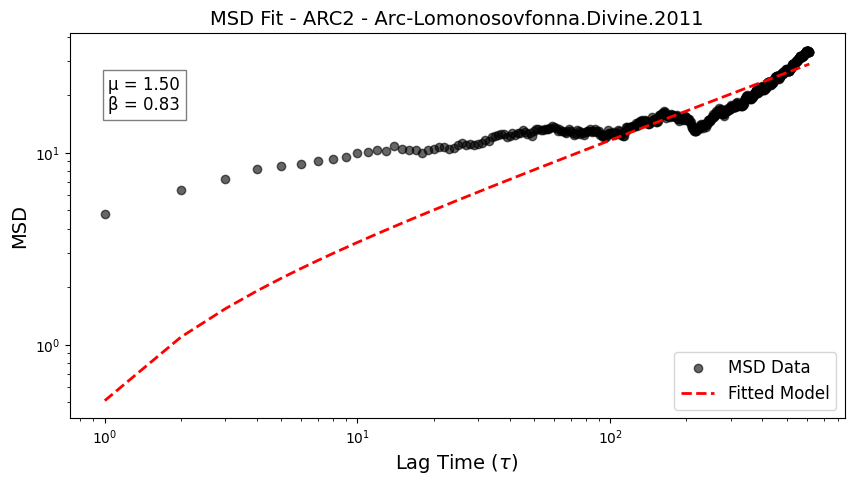


Detailed Fitting Parameters for ARC2 - Arc-Lomonosovfonna.Divine.2011:
μ (mu)       = 1.4996
β (beta)     = 0.8306

Fit Details:
Chi-Square        = 5331.2608
Reduced Chi-Square = 8.7112


{'mu': np.float64(1.499644876233169), 'beta': np.float64(0.830553546387629)}

In [70]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('ARC2 - Arc-Lomonosovfonna.Divine.2011', vertical_multiplier=1.0, horizontal_divider=1.0)


Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354


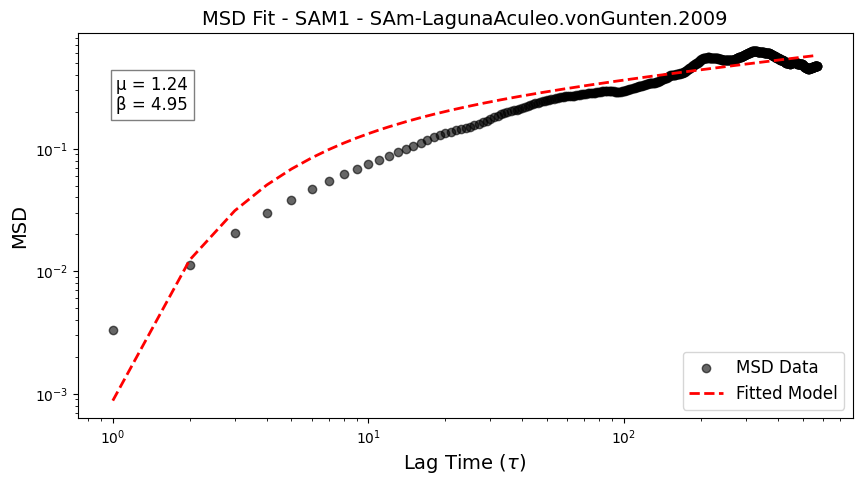


Detailed Fitting Parameters for SAM1 - SAm-LagunaAculeo.vonGunten.2009:
μ (mu)       = 1.2437
β (beta)     = 4.9520

Fit Details:
Chi-Square        = 3.0781
Reduced Chi-Square = 0.0054


{'mu': np.float64(1.2437065067255082), 'beta': np.float64(4.952040240346497)}

In [71]:
recompute_fits(mu_initial=1.0, mu_min=0.01, mu_max=5.0)
plot_selected_dataset('SAM1 - SAm-LagunaAculeo.vonGunten.2009', vertical_multiplier=1.0, horizontal_divider=1.0)

# **Manual Fit**

In [72]:
import numpy as np

def plot_scaled_msd(dataset_name,
                    mu, beta,
                    N_scale=1.0, T_scale=1.0):
    df = msd_dataframes.get(dataset_name)
    if df is None:
        print(f"Dataset '{dataset_name}' not found!")
        return

    # Extract raw data
    raw_T   = df["lagtime"].values
    raw_MSD = df["MSD"].values

    # Apply initial scaling
    scaled_T   = raw_T / T_scale
    scaled_MSD = N_scale * raw_MSD

    # Compute fitted MSD using original parameters
    fitted_msd_raw    = msd(raw_T, mu, beta)
    fitted_msd_scaled = N_scale * fitted_msd_raw

    # --- Extend theory from first theoretical point to last empirical lagtime ---
    T_theory_start = scaled_T.min()     # keep the very first theory point
    T_data_max     = raw_T.max()        # go out to the last empirical lagtime
    ext_T = np.logspace(np.log10(T_theory_start),
                        np.log10(T_data_max), 200)
    # convert back to original tau to compute msd, then vertically scale
    ext_msd = N_scale * msd(ext_T * T_scale, mu, beta)
    # --------------------------------------------------------

    plt.figure(figsize=(8, 6))
    plt.scatter(raw_T, raw_MSD, color="black", label="Empirical MSD", alpha=0.7, s = 200)
    # plt.plot(scaled_T,    fitted_msd_scaled, 'r--', label="Original Fit", linewidth=2)
    plt.plot(ext_T,       ext_msd,           'r-',  label="Theoretical MSD", linewidth=3)

    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"{dataset_name}", fontsize=14)
    plt.xlabel("Lagtime", fontsize=25)
    plt.ylabel("MSD", fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(fontsize=12)

    param_text = (
        f"μ = {mu:.2f}\n"
        f"β = {beta:.2f}\n"
        f"Tc = {T_scale:.2f}\n"
        f"N  = {N_scale:.2f}"
    )
    plt.text(0.03, 0.75, param_text, transform=plt.gca().transAxes, fontsize=15)

    plt.show()

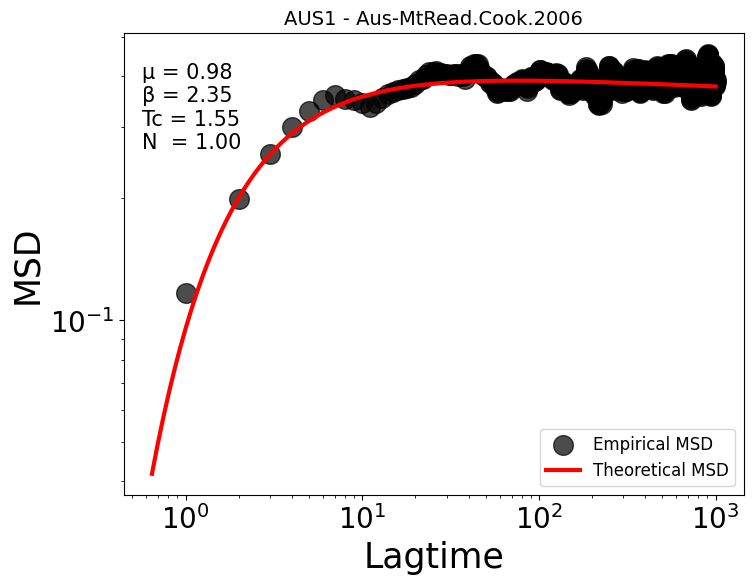

In [73]:
plot_scaled_msd("AUS1 - Aus-MtRead.Cook.2006",
                mu=0.98,
                beta=2.35,
                N_scale=1.0,
                T_scale=1.55)

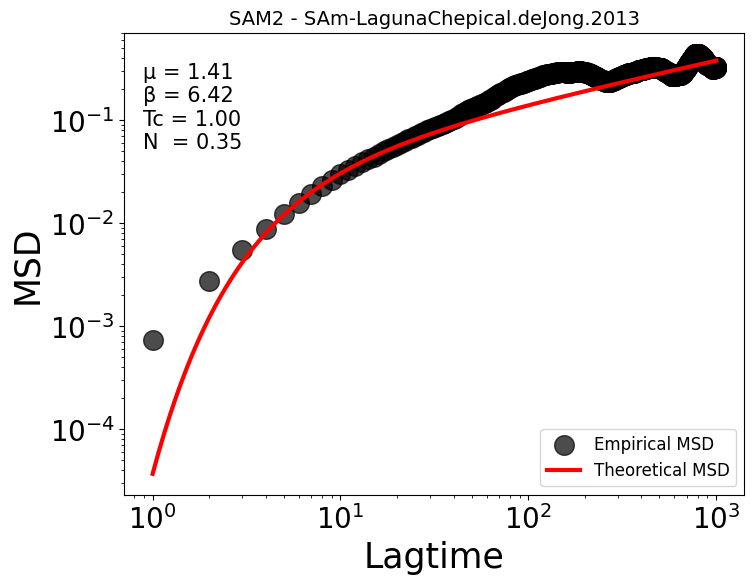

In [74]:
plot_scaled_msd("SAM2 - SAm-LagunaChepical.deJong.2013",
                mu=1.41,
                beta=6.42,
                N_scale=0.35,
                T_scale=1.0)

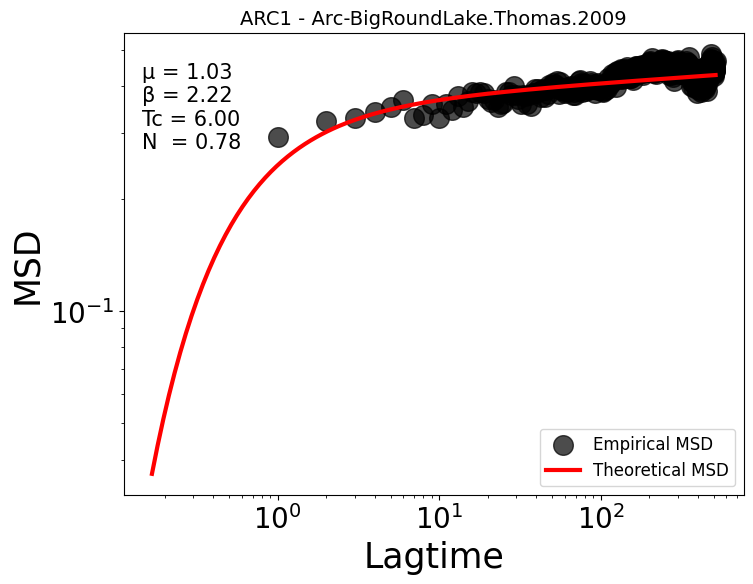

In [75]:
plot_scaled_msd("ARC1 - Arc-BigRoundLake.Thomas.2009",
                mu=1.03,
                beta=2.22,
                N_scale=0.78,
                T_scale=6.0)

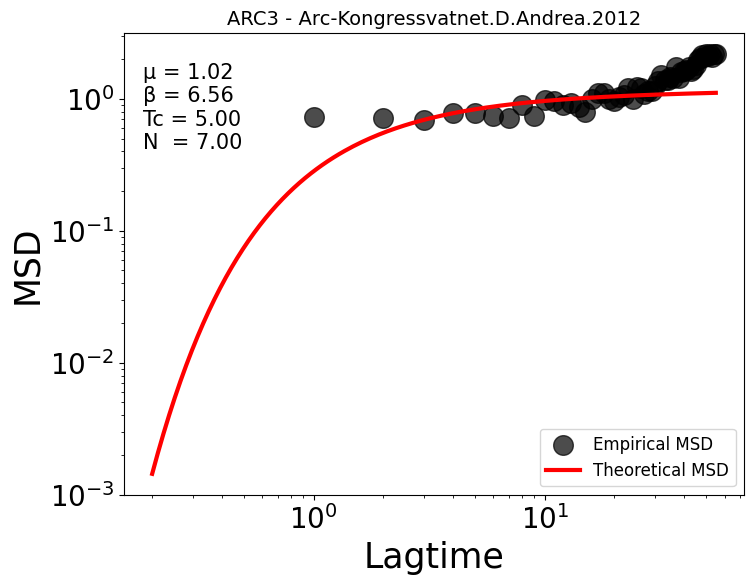

In [76]:
plot_scaled_msd("ARC3 - Arc-Kongressvatnet.D.Andrea.2012",
                mu=1.02,
                beta=6.56,
                N_scale=7.0,
                T_scale=5.0)

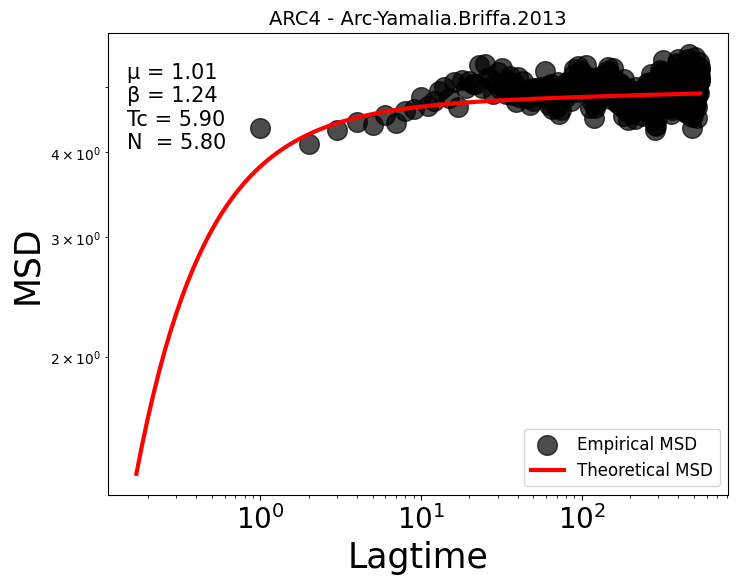

In [77]:
plot_scaled_msd("ARC4 - Arc-Yamalia.Briffa.2013",
                mu=1.006,
                beta=1.24,
                N_scale=5.8,
                T_scale=5.9)

In [78]:
plot_scaled_msd("AFR1 - Afr-P178-15P.Tierney.2015",
                mu=0.98,
                beta=6.81,
                N_scale=1.0,
                T_scale=2.8)

Dataset 'AFR1 - Afr-P178-15P.Tierney.2015' not found!


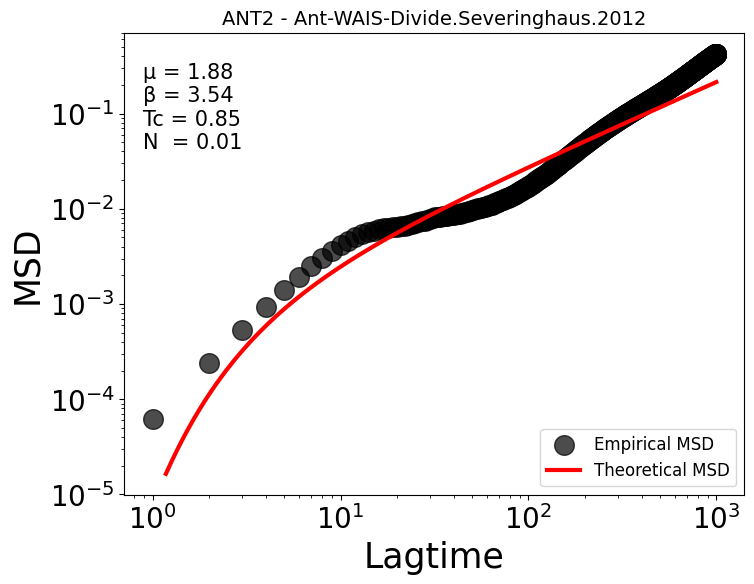

In [177]:
plot_scaled_msd("ANT2 - Ant-WAIS-Divide.Severinghaus.2012",
                mu=1.88,
                beta=3.54,
                N_scale=0.0064,
                T_scale=0.85)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

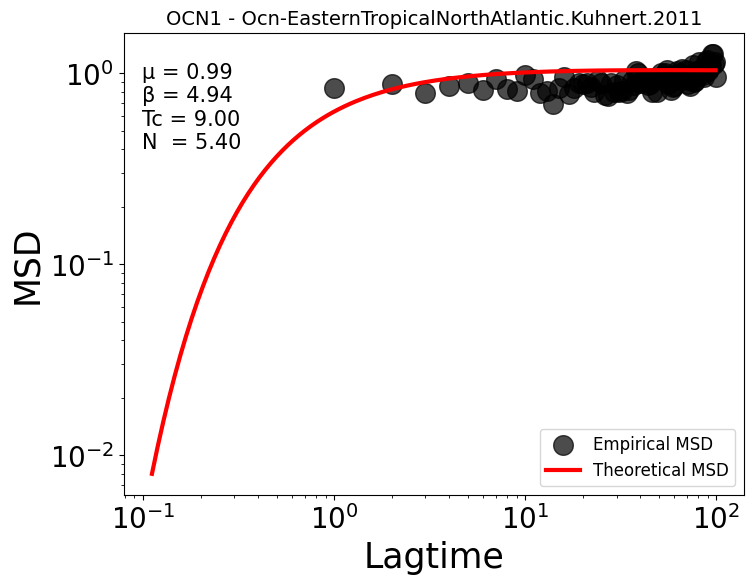

In [181]:
plot_scaled_msd("OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011",
                mu=0.99,
                beta=4.94,
                N_scale=5.4,
                T_scale=9.0)

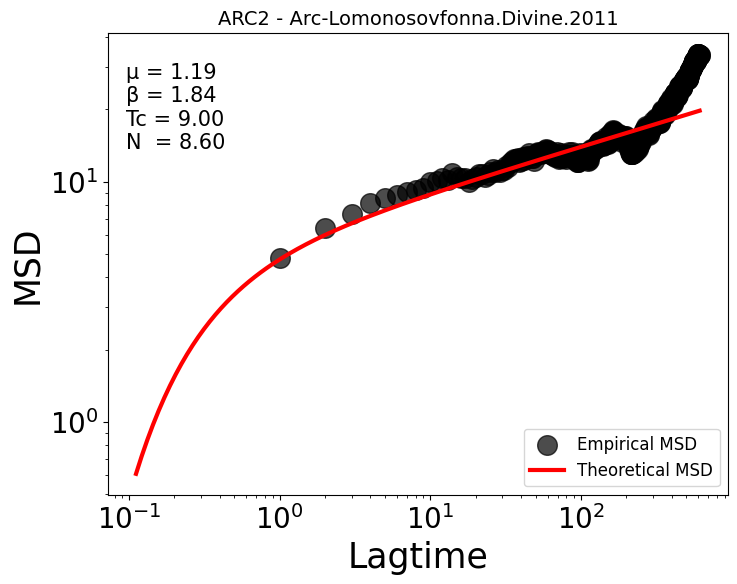

In [156]:
plot_scaled_msd("ARC2 - Arc-Lomonosovfonna.Divine.2011",
                mu=1.19,
                beta=1.84,
                N_scale=8.6,
                T_scale=9.0)

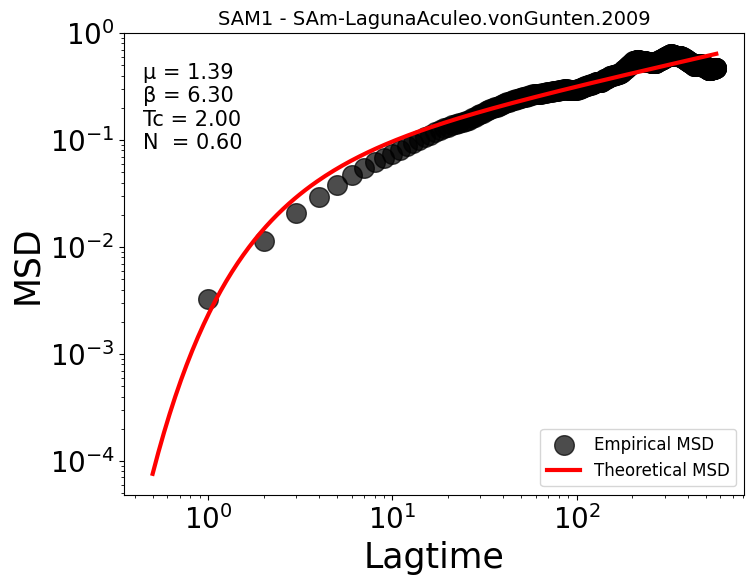

In [168]:
plot_scaled_msd("SAM1 - SAm-LagunaAculeo.vonGunten.2009",
                mu=1.39,
                beta=6.30,
                N_scale=0.6,
                T_scale=2.0)

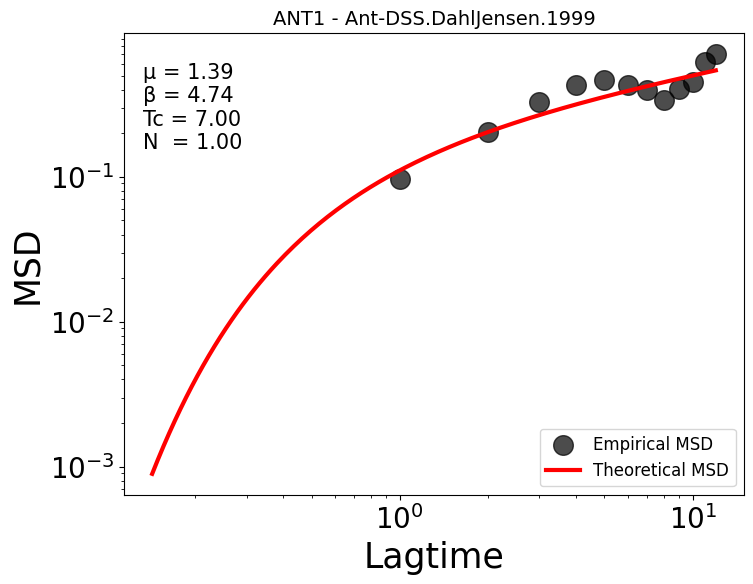

In [175]:
plot_scaled_msd("ANT1 - Ant-DSS.DahlJensen.1999",
                mu=1.39,
                beta=4.74,
                N_scale=1.0,
                T_scale=7.0)

Updated Fitted Parameters:
OCN1 - Ocn-EasternTropicalNorthAtlantic.Kuhnert.2011: μ = 1.007, β = 1.041 /
ARC1 - Arc-BigRoundLake.Thomas.2009: μ = 1.010, β = 2.366 /
ARC2 - Arc-Lomonosovfonna.Divine.2011: μ = 1.500, β = 0.831 /
SAM1 - SAm-LagunaAculeo.vonGunten.2009: μ = 1.244, β = 4.952 /
SAM2 - SAm-LagunaChepical.deJong.2013: μ = 1.213, β = 7.057 /
ARC3 - Arc-Kongressvatnet.D.Andrea.2012: μ = 1.454, β = 1.959 /
ANT1 - Ant-DSS.DahlJensen.1999: μ = 1.105, β = 1.815 /
ARC4 - Arc-Yamalia.Briffa.2013: μ = 1.001, β = 0.204 /
ANT2 - Ant-WAIS-Divide.Severinghaus.2012: μ = 2.244, β = 69.621 /
AUS1 - Aus-MtRead.Cook.2006: μ = 0.985, β = 2.354 /

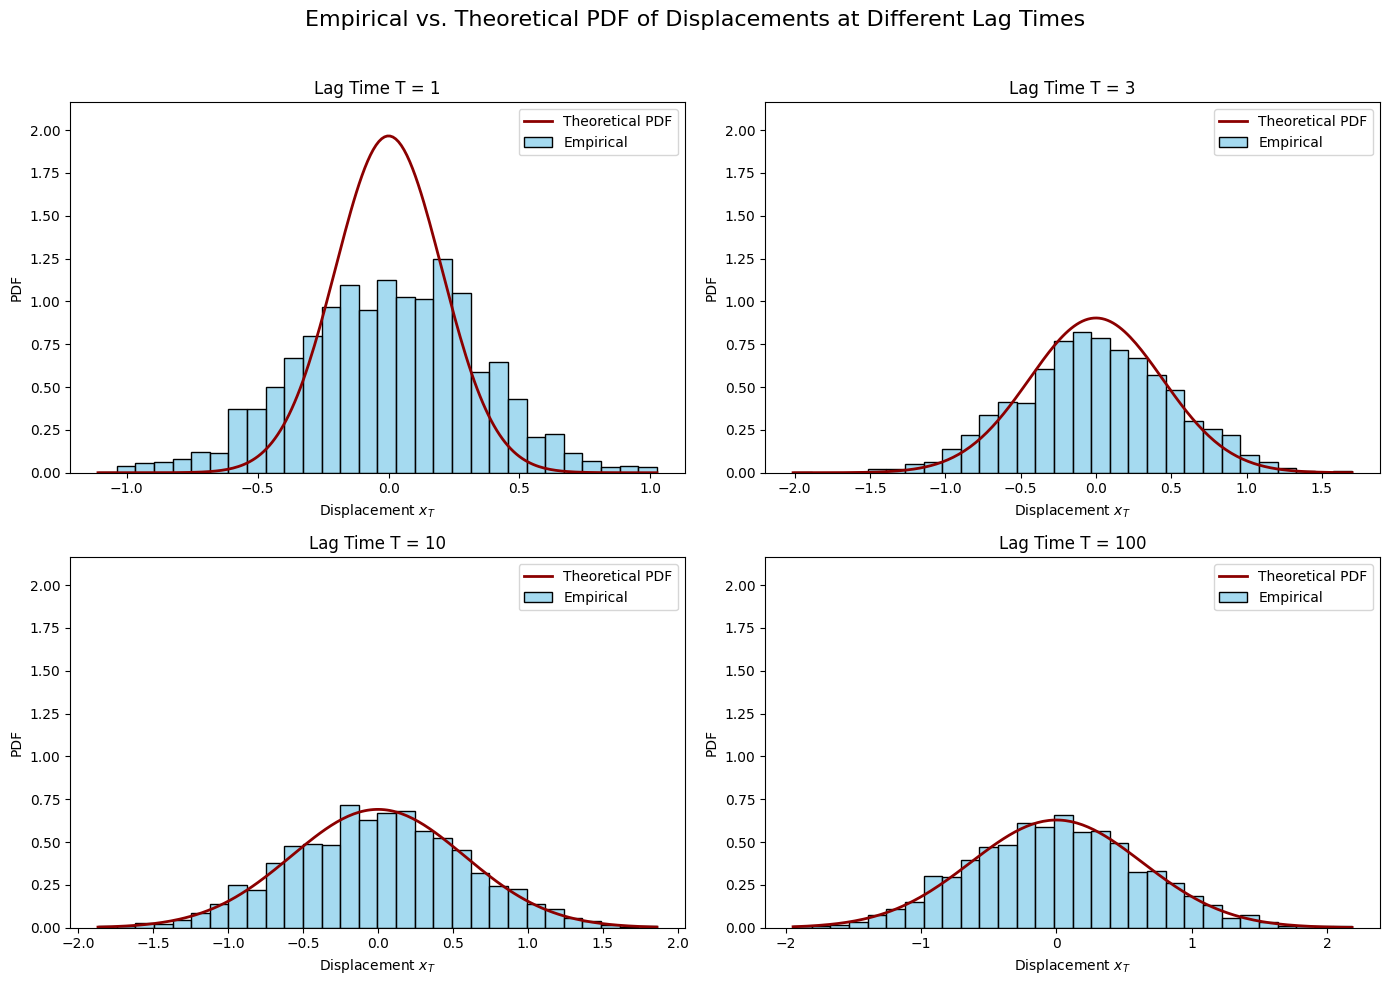

In [80]:
import seaborn as sns

raw_data = aus1["paleoData_values"].dropna().values
mu = 0.99
beta = 2.35
lag_times = [1, 3, 10, 100]

# Determine common y-axis limit
y_max = 0
pdf_storage = []

for T in lag_times:
    displacements = raw_data[T:] - raw_data[:-T]
    x_vals = np.linspace(np.min(displacements), np.max(displacements), 200)
    pdf_vals = pdf(x_vals, T, mu, beta)

    # Store data for plotting later
    pdf_storage.append((T, displacements, x_vals, pdf_vals))

    # Estimate histogram density max
    hist_vals, _ = np.histogram(displacements, bins=30, density=True)
    y_max = max(y_max, np.max(pdf_vals), np.max(hist_vals))

# Add some padding to y-axis limit
y_max *= 1.1

plt.figure(figsize=(14, 10))
for i, (T, displacements, x_vals, pdf_vals) in enumerate(pdf_storage, 1):
    plt.subplot(2, 2, i)

    sns.histplot(displacements, stat="density", bins=30, color="skyblue", label="Empirical", kde=False)
    plt.plot(x_vals, pdf_vals, color="darkred", label="Theoretical PDF", linewidth=2)

    plt.title(f"Lag Time T = {T}")
    plt.xlabel("Displacement $x_T$")
    plt.ylabel("PDF")
    plt.ylim(0, y_max)
    plt.legend()

plt.suptitle("Empirical vs. Theoretical PDF of Displacements at Different Lag Times", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Clustering**

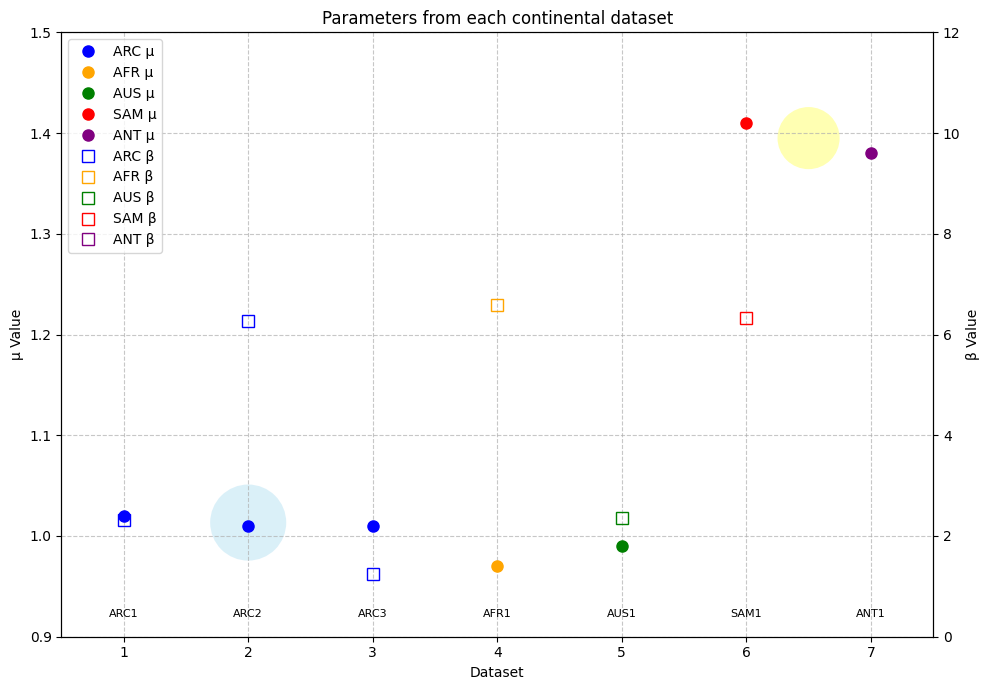

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create DataFrame from the provided data
data = {
    'Continent': ['ARC', 'ARC', 'ARC', 'AFR', 'AUS', 'SAM', 'ANT'],
    'Data #': ['ARC1', 'ARC2', 'ARC3', 'AFR1', 'AUS1', 'SAM1', 'ANT1'],
    'Dataset': ['BigRoundLake.Thomas.2009', 'Kongressvatnet.D.Andrea.2012', 'Yamalia.Briffa.2013',
                'P178-15P.Tierney.2015', 'MtRead.Cook.2006', 'LagunaChepical.deJong.2013',
                'WAIS-Divide.Severinghaus.2012'],
    'mu': [1.02, 1.01, 1.01, 0.97, 0.99, 1.41, 1.38],
    'beta': [2.32, 6.26, 1.24, 6.58, 2.35, 6.32, 69.64],
    'Tc': [5, 5, 3.5, 2.8, 1.35, 1, 7],
    'N': [0.85, 7, 5.8, 1, 1, 0.35, 1]
}

df = pd.DataFrame(data)

# Create a figure and axis
plt.figure(figsize=(10, 7))

# Set up x positions for the datasets
x_positions = np.arange(1, len(df) + 1)

# Create a colormap based on continent
continent_colors = {
    'ARC': 'blue',
    'AFR': 'orange',
    'AUS': 'green',
    'SAM': 'red',
    'ANT': 'purple'
}

# Plot mu values with filled circles
for i, row in df.iterrows():
    plt.plot(
        x_positions[i],
        row['mu'],
        'o',
        color=continent_colors.get(row['Continent'], 'black'),
        label=f"{row['Continent']} μ" if row['Continent'] not in [r['Continent'] for r in df.iloc[:i].to_dict('records')] else "",
        markersize=8
    )

# Create a second y-axis for beta values
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot beta values with empty squares on the second y-axis
for i, row in df.iterrows():
    ax2.plot(
        x_positions[i],
        row['beta'],
        's',
        markerfacecolor='none',
        color=continent_colors.get(row['Continent'], 'black'),
        label=f"{row['Continent']} β" if row['Continent'] not in [r['Continent'] for r in df.iloc[:i].to_dict('records')] else "",
        markersize=8
    )

# Add shaded regions to highlight patterns
# Arctic data
arctic_x = x_positions[:3]
arctic_y_center = np.mean(df['mu'].iloc[:3])
ax1.scatter(np.mean(arctic_x), arctic_y_center, s=3000, color='skyblue', alpha=0.3, edgecolor='none', zorder=0)

# Antarctic + South American data
ant_sam_x = [x_positions[5], x_positions[6]]
ant_sam_y_center = np.mean(df['mu'].iloc[5:])
ax1.scatter(np.mean(ant_sam_x), ant_sam_y_center, s=2000, color='yellow', alpha=0.3, edgecolor='none', zorder=0)

# Set limits, labels, and title
ax1.set_xlim(0.5, len(df) + 0.5)
ax1.set_ylim(0.9, 1.5)  # Adjusted to better show mu values
ax2.set_ylim(0, 12)  # Adjusted for beta values (excluding the extreme ANT value)
ax1.set_xlabel('Dataset')
ax1.set_ylabel('μ Value')
ax2.set_ylabel('β Value')
plt.title('Parameters from each continental dataset')

# Set custom x-ticks
plt.xticks(x_positions, [f"{i+1}" for i in range(len(df))])

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Add a note about the extreme Antarctic value
ax1.annotate(f"Antarctic β = {df['beta'].iloc[6]}", xy=(x_positions[6], 10),
             xytext=(x_positions[6]-1, 10.5), fontsize=9,
             arrowprops=dict(arrowstyle='->'))

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
by_label = dict(zip(labels1 + labels2, handles1 + handles2))
ax1.legend(by_label.values(), by_label.keys(), loc='best')

# Add annotations for dataset details
for i, txt in enumerate(df['Data #']):
    ax1.annotate(txt, (x_positions[i], 0.92), ha='center', fontsize=8)

# Add dataset numbers on the x-axis
ax1.set_xticks(x_positions)
ax1.set_xticklabels([f"{i+1}" for i in range(len(df))])

plt.tight_layout()
plt.show()

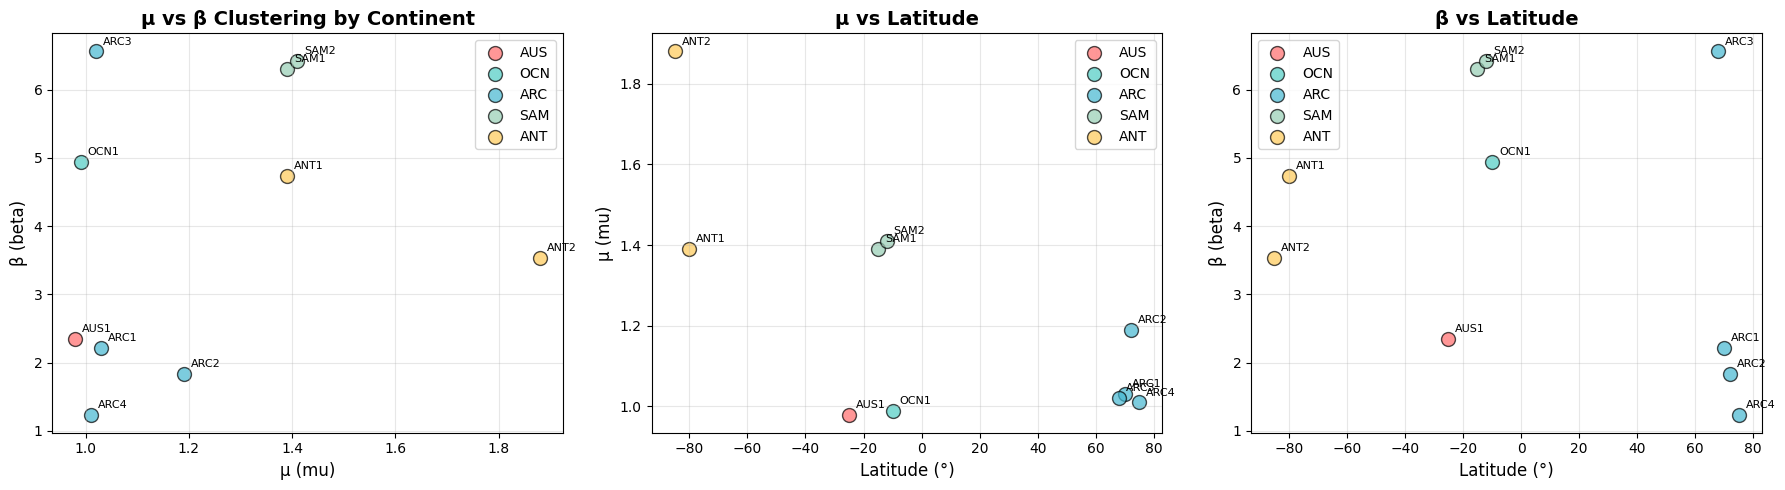

=== PATTERN ANALYSIS ===

1. μ vs β Clustering:
- Arctic (ARC): μ ≈ 1.0-1.2, β varies widely (1.2-6.6)
- South America (SAM): High μ (1.4), High β (6.3-6.4)
- Antarctica (ANT): Variable μ (1.4-1.9), moderate β (3.5-4.7)
- Australia/Oceania: Low μ (~1.0), moderate β

2. μ vs Latitude:
- Polar regions (ARC, ANT) show varied μ values
- Tropical/subtropical regions show lower μ values
- Highest μ values in Antarctica (ANT2: 1.88)

3. β vs Latitude:
- No clear latitudinal trend for β
- Highest β values in South America and some Arctic sites
- Antarctic sites show moderate β values

Correlations:
μ vs β: 0.248
μ vs Latitude: -0.687
β vs Latitude: -0.320

Summary by Continent:
              mu          beta       
            mean    std   mean    std
Continent                            
ANT        1.635  0.346  4.140  0.849
ARC        1.062  0.085  2.965  2.430
AUS        0.980    NaN  2.350    NaN
OCN        0.990    NaN  4.940    NaN
SAM        1.400  0.014  6.360  0.085


In [184]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from the table
data = {
    'Continent': ['AUS', 'OCN', 'ARC', 'ARC', 'ARC', 'ARC', 'SAM', 'SAM', 'ANT', 'ANT'],
    'Dataset': ['AUS1', 'OCN1', 'ARC1', 'ARC2', 'ARC3', 'ARC4', 'SAM1', 'SAM2', 'ANT1', 'ANT2'],
    'mu': [0.98, 0.99, 1.03, 1.19, 1.02, 1.01, 1.39, 1.41, 1.39, 1.88],
    'beta': [2.35, 4.94, 2.22, 1.84, 6.56, 1.24, 6.30, 6.42, 4.74, 3.54],
    'Tc': [1.55, 9.00, 6.00, 9.00, 5.00, 5.90, 2.00, 1.00, 7.00, 0.85],
    'N': [1, 5.4, 0.78, 8.6, 7.0, 5.8, 0.6, 0.35, 1.0, 0.01],
    # Approximate latitudes based on continent codes
    'latitude': [-25, -10, 70, 72, 68, 75, -15, -12, -80, -85]
}

df = pd.DataFrame(data)

# Color mapping for continents
colors = {'AUS': '#FF6B6B', 'OCN': '#4ECDC4', 'ARC': '#45B7D1',
          'SAM': '#96CEB4', 'ANT': '#FECA57'}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: μ vs β clustering
for continent in df['Continent'].unique():
    subset = df[df['Continent'] == continent]
    axes[0].scatter(subset['mu'], subset['beta'], c=colors[continent],
                   label=continent, s=100, alpha=0.7, edgecolors='black')

    # Add dataset labels
    for _, row in subset.iterrows():
        axes[0].annotate(row['Dataset'], (row['mu'], row['beta']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[0].set_xlabel('μ (mu)', fontsize=12)
axes[0].set_ylabel('β (beta)', fontsize=12)
axes[0].set_title('μ vs β Clustering by Continent', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: μ vs Latitude
for continent in df['Continent'].unique():
    subset = df[df['Continent'] == continent]
    axes[1].scatter(subset['latitude'], subset['mu'], c=colors[continent],
                   label=continent, s=100, alpha=0.7, edgecolors='black')

    # Add dataset labels
    for _, row in subset.iterrows():
        axes[1].annotate(row['Dataset'], (row['latitude'], row['mu']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1].set_xlabel('Latitude (°)', fontsize=12)
axes[1].set_ylabel('μ (mu)', fontsize=12)
axes[1].set_title('μ vs Latitude', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: β vs Latitude
for continent in df['Continent'].unique():
    subset = df[df['Continent'] == continent]
    axes[2].scatter(subset['latitude'], subset['beta'], c=colors[continent],
                   label=continent, s=100, alpha=0.7, edgecolors='black')

    # Add dataset labels
    for _, row in subset.iterrows():
        axes[2].annotate(row['Dataset'], (row['latitude'], row['beta']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[2].set_xlabel('Latitude (°)', fontsize=12)
axes[2].set_ylabel('β (beta)', fontsize=12)
axes[2].set_title('β vs Latitude', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pattern analysis
print("=== PATTERN ANALYSIS ===")
print("\n1. μ vs β Clustering:")
print("- Arctic (ARC): μ ≈ 1.0-1.2, β varies widely (1.2-6.6)")
print("- South America (SAM): High μ (1.4), High β (6.3-6.4)")
print("- Antarctica (ANT): Variable μ (1.4-1.9), moderate β (3.5-4.7)")
print("- Australia/Oceania: Low μ (~1.0), moderate β")

print("\n2. μ vs Latitude:")
print("- Polar regions (ARC, ANT) show varied μ values")
print("- Tropical/subtropical regions show lower μ values")
print("- Highest μ values in Antarctica (ANT2: 1.88)")

print("\n3. β vs Latitude:")
print("- No clear latitudinal trend for β")
print("- Highest β values in South America and some Arctic sites")
print("- Antarctic sites show moderate β values")

# Correlation analysis
print(f"\nCorrelations:")
print(f"μ vs β: {df['mu'].corr(df['beta']):.3f}")
print(f"μ vs Latitude: {df['mu'].corr(df['latitude']):.3f}")
print(f"β vs Latitude: {df['beta'].corr(df['latitude']):.3f}")

# Summary statistics by continent
print(f"\nSummary by Continent:")
summary = df.groupby('Continent')[['mu', 'beta']].agg(['mean', 'std']).round(3)
print(summary)

# **First Passage Time**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.special as sp

# ======================= PARAMETERS =======================
mu = 0.99
beta = 2.35
X_i = 0.0
X_c = 5.0
T_min = 1.0
T_max = 100.0
n_t_points = 100
n_x_points = 500

# ======================= PDF + Analysis Functions =======================

def pdf(x_T, T, mu, beta):
    gamma_mu = sp.gamma(mu)
    prefactor = (beta**(mu/2) * np.exp(beta / (2*T))) / np.sqrt(2 * np.pi * gamma_mu * T**(mu - 1))
    exponent = - (beta**mu * np.exp(beta / T) * (x_T**2) / (2 * gamma_mu * T**(mu - 1)))
    return prefactor * np.exp(exponent)

def msd(T, mu, beta):
    gamma_mu = sp.gamma(mu)
    return (gamma_mu * T**(mu - 1)) / (beta**mu * np.exp(beta / T))

def linear_combination_pdf(x, T, mu, beta, X_i, X_c, alpha=0.5):
    pdf_original = pdf(x - X_i, T, mu, beta)
    pdf_reflected = pdf(x - (2*X_c - X_i), T, mu, beta)
    return (1 - alpha)*pdf_original + alpha*pdf_reflected

def survival_probability(X_c, T, mu, beta, X_i, x_vals):
    y_vals = linear_combination_pdf(x_vals, T, mu, beta, X_i, X_c)
    return np.trapz(y_vals, x_vals)

def first_passage_time(T_values, mu, beta, X_i, X_c):
    msd_vals = msd(T_values, mu, beta)
    dmsd_dt = np.gradient(msd_vals, T_values)
    distance_sq = (X_c - X_i)**2
    return distance_sq / (2 * dmsd_dt)

# ======================= Plot Function for One Dataset =======================

def analyze_dataset(df, name):
    values = df["paleoData_values"].dropna().values
    if len(values) < 10:
        print(f"Skipping {name}: not enough data.")
        return

    x_min = np.min(values)
    x_max = np.max(values)
    x_vals = np.linspace(x_min, x_max, n_x_points)
    T_range = np.linspace(T_min, T_max, n_t_points)

    fig = plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 2)
    fig.suptitle(f"PDF Analysis for {name}", fontsize=16)

    # 1. Linear Combination of PDFs
    ax1 = fig.add_subplot(gs[0, 0])
    for T in [T_min, (T_min + T_max) / 2, T_max]:
        y_comb = linear_combination_pdf(x_vals, T, mu, beta, X_i, X_c)
        ax1.plot(x_vals, y_comb, label=f'T = {T:.1f}')
    ax1.set_title('Linear Combination of PDFs')
    ax1.set_xlabel('x')
    ax1.set_ylabel('PDF')
    ax1.legend()

    # 2. Survival Probability vs Time
    ax2 = fig.add_subplot(gs[0, 1])
    surv_probs = [survival_probability(X_c, T, mu, beta, X_i, x_vals) for T in T_range]
    ax2.plot(T_range, surv_probs)
    ax2.set_title('Survival Probability S(t)')
    ax2.set_xlabel('Time (T)')
    ax2.set_ylabel('S(t)')

    # 3. Time Derivative of MSD
    ax3 = fig.add_subplot(gs[1, 0])
    msd_vals = msd(T_range, mu, beta)
    dmsd_dt = np.gradient(msd_vals, T_range)
    ax3.plot(T_range, dmsd_dt)
    ax3.set_title('Time Derivative of MSD')
    ax3.set_xlabel('Time (T)')
    ax3.set_ylabel('dMSD/dt')

    # 4. First Passage Time
    ax4 = fig.add_subplot(gs[1, 1])
    fpt_vals = first_passage_time(T_range, mu, beta, X_i, X_c)
    ax4.plot(T_range, fpt_vals)
    ax4.set_title(f'First Passage Time')
    ax4.set_xlabel('Time (T)')
    ax4.set_ylabel('First Passage Time')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# ======================= Dataset Analysis Loop =======================

datasets_to_run = {
    "aus1": aus1,
    "arc1": arc1,
    "arc2": arc2,
}

for name, df in datasets_to_run.items():
    analyze_dataset(df, name)